<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [3]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [4]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [5]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhiraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [7]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 209.44583440000002 seconds


In [8]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [8]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [9]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [13]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [10]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [10]:
#Assignment
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
train_df, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
#train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [12]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
#print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2656
Number of data points in test data: 665


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

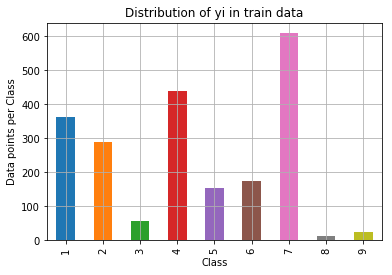

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


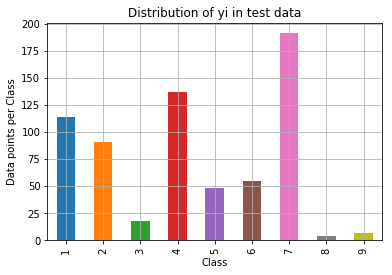

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


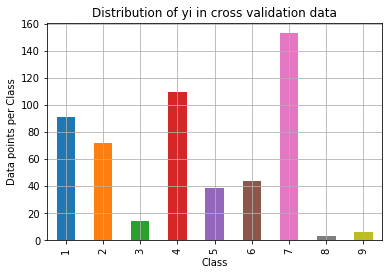

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [21]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [11]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.536598785706848
Log loss on Test Data using Random Model 2.501572555849742
-------------------- Confusion matrix --------------------


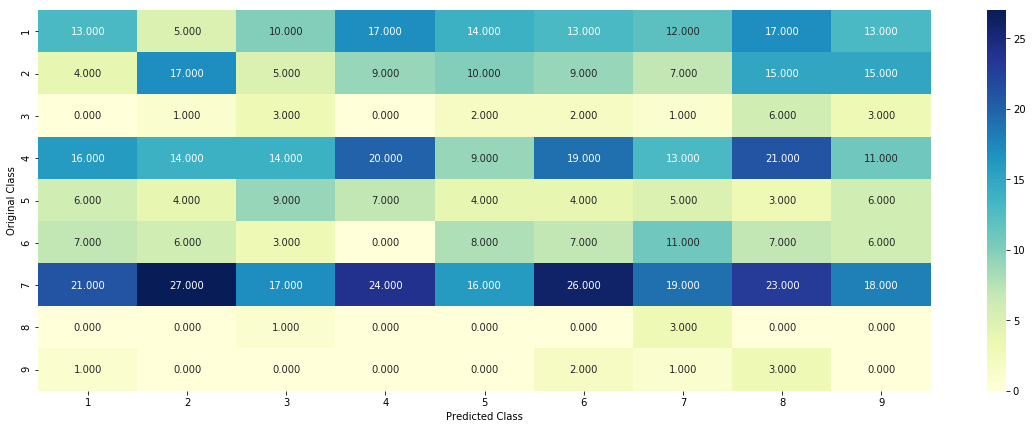

-------------------- Precision matrix (Columm Sum=1) --------------------


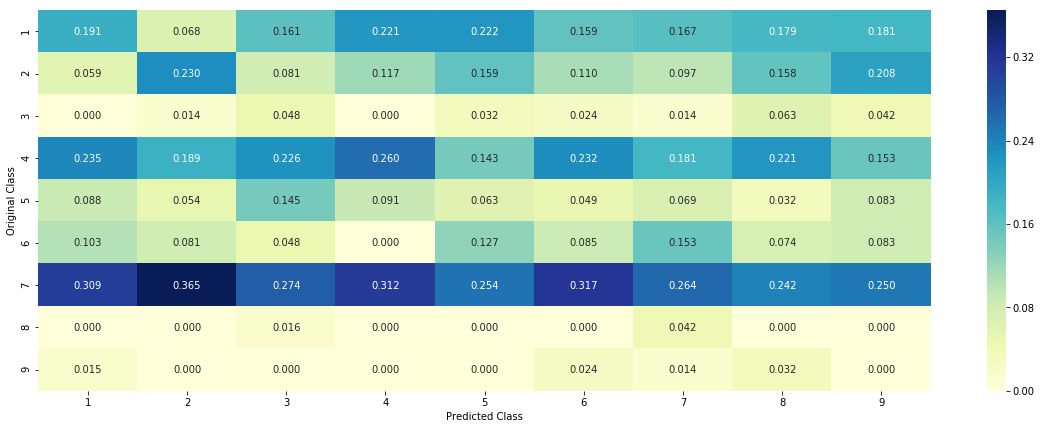

-------------------- Recall matrix (Row sum=1) --------------------


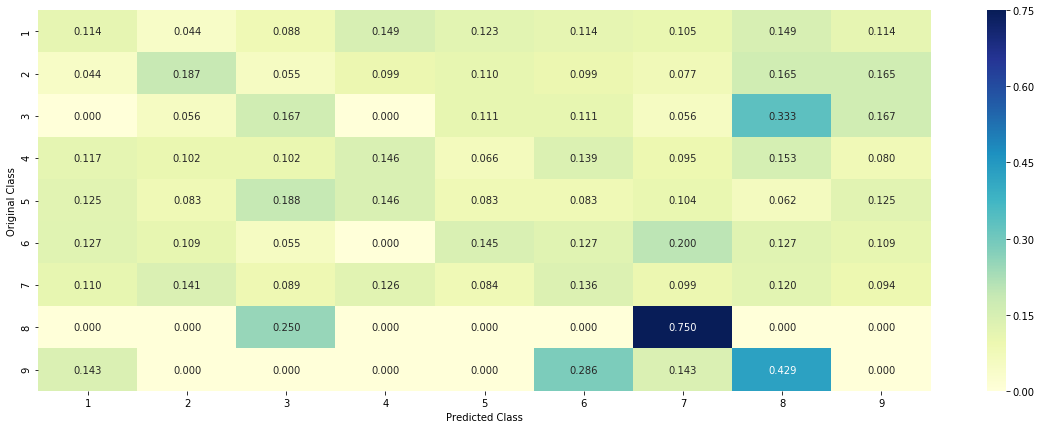

In [26]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [19]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [28]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 229
BRCA1     164
TP53       90
EGFR       88
PTEN       82
BRCA2      78
KIT        67
BRAF       51
ALK        48
ERBB2      46
PIK3CA     37
Name: Gene, dtype: int64


In [29]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 229 different categories of genes in the train data, and they are distibuted as follows


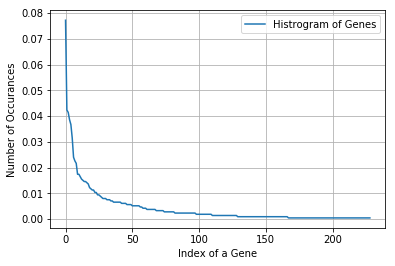

In [30]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


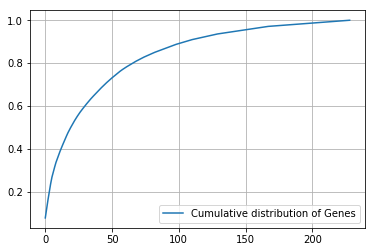

In [31]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [85]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
#cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [86]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2656, 9)


In [151]:
train_df.shape

(2656, 5)

In [12]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
#cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [154]:
# Assignment 
# Bigram
# one-hot encoding of Gene feature.
gene_vectorizer_bigram = CountVectorizer(ngram_range=(1,2))
train_gene_feature_bigram = gene_vectorizer_bigram.fit_transform(train_df['Gene'])
test_gene_feature_bigram = gene_vectorizer_bigram.transform(test_df['Gene'])
#cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [23]:
train_df['Gene'].head()

13         CBL
663     CDKN2A
3120      KRAS
3085    NOTCH1
2353     AURKA
Name: Gene, dtype: object

In [24]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl1',
 'asxl2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 '

In [25]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2656, 250)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.418841767162939
For values of alpha =  0.0001 The log loss is: 1.2325868001617826
For values of alpha =  0.001 The log loss is: 1.2503129272158073
For values of alpha =  0.01 The log loss is: 1.360379976757511
For values of alpha =  0.1 The log loss is: 1.4314392521126913
For values of alpha =  1 The log loss is: 1.4659143358159061


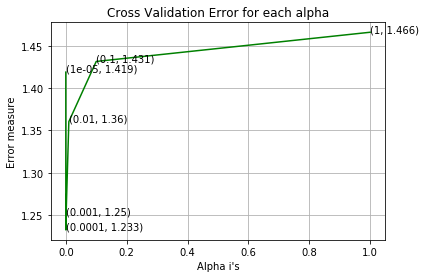

For values of best alpha =  0.0001 The train log loss is: 1.0425604300119806
For values of best alpha =  0.0001 The cross validation log loss is: 1.2325868001617826
For values of best alpha =  0.0001 The test log loss is: 1.200905436534172


In [38]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [39]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  229  genes in train dataset?
Ans
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 514 out of  532 : 96.61654135338345


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [40]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1924
Truncating_Mutations         59
Deletion                     49
Amplification                47
Fusions                      23
E17K                          3
Overexpression                3
Q22K                          2
Promoter_Hypermethylation     2
G13D                          2
T73I                          2
Name: Variation, dtype: int64


In [41]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1924 different categories of variations in the train data, and they are distibuted as follows


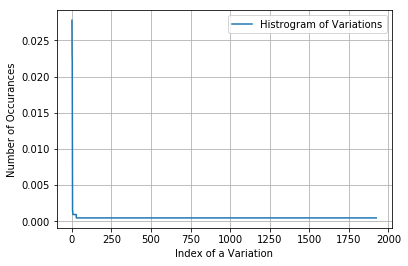

In [42]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02777778 0.05084746 0.07297552 ... 0.99905838 0.99952919 1.        ]


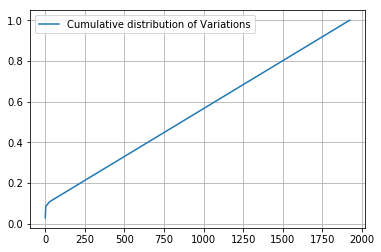

In [43]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [26]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
# cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [27]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2656, 9)


In [13]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
##cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [155]:
# Assignment
# Bigram
# one-hot encoding of variation feature.
variation_vectorizer_bigram = CountVectorizer(ngram_range=(1,2))
train_variation_feature_bigram = variation_vectorizer_bigram.fit_transform(train_df['Variation'])
test_variation_feature_bigram = variation_vectorizer_bigram.transform(test_df['Variation'])
##cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [29]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2656, 2419)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7023621747765858
For values of alpha =  0.0001 The log loss is: 1.689842322110077
For values of alpha =  0.001 The log loss is: 1.6907130717518253
For values of alpha =  0.01 The log loss is: 1.7001345396142153
For values of alpha =  0.1 The log loss is: 1.7081826775989355
For values of alpha =  1 The log loss is: 1.710131025593559


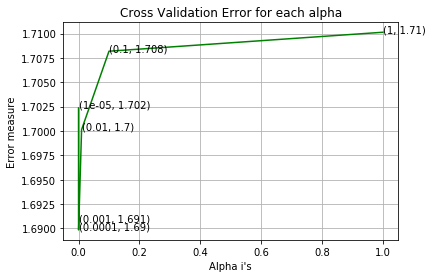

For values of best alpha =  0.0001 The train log loss is: 0.8255455900343496
For values of best alpha =  0.0001 The cross validation log loss is: 1.689842322110077
For values of best alpha =  0.0001 The test log loss is: 1.7362385768757977


In [48]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [49]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1924  genes in test and cross validation data sets?
Ans
1. In test data 64 out of 665 : 9.624060150375941
2. In cross validation data 56 out of  532 : 10.526315789473683


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [30]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [31]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [91]:
# Assignment
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding_tfidf(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                if word in train_text_features_tfidf:
                    sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
                text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [52]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 54850


In [168]:
# Assignment
# Bigram
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_bigram = CountVectorizer(ngram_range=(1,2), min_df=3)
train_text_feature_bigram = text_vectorizer_bigram.fit_transform(train_df['TEXT'])
test_text_feature_bigram = text_vectorizer_bigram.transform(test_df['TEXT'])

In [ ]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_features=1000)
train_text_feature_tfidf = tfidf_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)

In [83]:
train_text_features_tfidf = tfidf_vectorizer.get_feature_names()
train_text_features_tfidf

['000',
 '01',
 '05',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1997',
 '1998',
 '1999',
 '1a',
 '1b',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2a',
 '2b',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3a',
 '3b',
 '3t3',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '4a',
 '50',
 '51',
 '52',
 '54',
 '56',
 '57',
 '59',
 '60',
 '61',
 '70',
 '72',
 '75',
 '80',
 '90',
 '95',
 'aberrant',
 'ability',
 'abl',
 'able',
 'absence',
 'according',
 'acid',
 'acids',
 'acquired',
 'across',
 'activate',
 'activated',
 'activating',
 'activation',
 'active',
 'activities',
 'activity',
 'added',
 'addition',
 'additional',
 'adenocarcinoma',
 'advanced',
 'affect',
 'affected',
 'affinity',
 'age',
 'akt',
 'akt1',
 'al',
 'alk',
 'allele',
 '

In [89]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)

In [54]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [92]:
# Assignment
#response coding of text features
train_text_feature_responseCoding_tfidf  = get_text_responsecoding_tfidf(train_df)
test_text_feature_responseCoding_tfidf  = get_text_responsecoding_tfidf(test_df)

In [96]:
# Assignment
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding_tfidf = \
    (train_text_feature_responseCoding_tfidf.T/train_text_feature_responseCoding_tfidf.sum(axis=1)).T
test_text_feature_responseCoding_tfidf = \
    (test_text_feature_responseCoding_tfidf.T/test_text_feature_responseCoding_tfidf.sum(axis=1)).T

In [55]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [56]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [34]:
# Assignment
# don't forget to normalize every feature
train_text_feature_tfidf = normalize(train_text_feature_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_tfidf = tfidf_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_tfidf = normalize(test_text_feature_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
# cv_text_feature_tfidf = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
# cv_text_feature_tfidf = normalize(cv_text_feature_onehotCoding, axis=0)

In [157]:
# Assignment
# don't forget to normalize every feature
train_text_feature_bigram = normalize(train_text_feature_bigram, axis=0)
train_gene_feature_bigram = normalize(train_gene_feature_bigram, axis=0)
train_variation_feature_bigram = normalize(train_variation_feature_bigram, axis=0)

# don't forget to normalize every feature
test_text_feature_bigram = normalize(test_text_feature_bigram, axis=0)
test_gene_feature_bigram = normalize(test_gene_feature_bigram, axis=0)
test_variation_feature_bigram = normalize(test_variation_feature_bigram, axis=0)

# we use the same vectorizer that was trained on train data
# cv_text_feature_tfidf = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
# cv_text_feature_tfidf = normalize(cv_text_feature_onehotCoding, axis=0)

In [172]:
# Assignment
# don't forget to normalize every feature
train_text_feature_bigram = normalize(train_text_feature_bigram, axis=0)
test_text_feature_bigram = normalize(test_text_feature_bigram, axis=0)

In [57]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [58]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 6168, 4: 3775, 5: 3025, 6: 2977, 9: 2140, 8: 1985, 7: 1945, 10: 1323, 12: 1133, 11: 1107, 13: 1068, 15: 1059, 14: 873, 16: 851, 18: 747, 17: 575, 24: 574, 20: 552, 21: 509, 19: 495, 22: 466, 25: 415, 37: 413, 27: 396, 28: 394, 23: 380, 30: 378, 26: 319, 45: 312, 29: 284, 34: 282, 35: 275, 31: 274, 32: 259, 36: 253, 33: 240, 44: 231, 40: 225, 39: 220, 48: 206, 42: 204, 38: 204, 56: 177, 47: 173, 43: 173, 46: 171, 41: 168, 51: 161, 50: 159, 60: 143, 53: 140, 52: 136, 49: 133, 57: 132, 55: 131, 54: 128, 70: 120, 67: 116, 58: 113, 74: 111, 66: 108, 62: 105, 59: 104, 88: 102, 64: 101, 61: 100, 63: 99, 65: 98, 78: 97, 75: 96, 72: 96, 68: 94, 80: 93, 69: 92, 79: 85, 73: 81, 71: 79, 91: 77, 82: 77, 86: 76, 83: 76, 90: 75, 77: 73, 84: 72, 93: 69, 81: 69, 76: 68, 95: 65, 96: 64, 87: 63, 92: 59, 98: 58, 85: 58, 120: 57, 99: 56, 115: 55, 100: 55, 108: 54, 102: 54, 107: 53, 89: 53, 132: 52, 116: 52, 109: 52, 105: 52, 101: 51, 111: 50, 97: 50, 94: 50, 140: 48, 110: 48, 104: 48, 103: 48, 

For values of alpha =  1e-05 The log loss is: 1.4798785760828574
For values of alpha =  0.0001 The log loss is: 1.4534937808292785
For values of alpha =  0.001 The log loss is: 1.3062465612808916
For values of alpha =  0.01 The log loss is: 1.4138930975129917
For values of alpha =  0.1 The log loss is: 1.5031084843525189
For values of alpha =  1 The log loss is: 1.6391636597237738


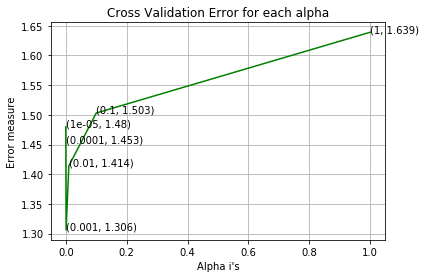

For values of best alpha =  0.001 The train log loss is: 0.7614133457365512
For values of best alpha =  0.001 The cross validation log loss is: 1.3062465612808916
For values of best alpha =  0.001 The test log loss is: 1.1902669954542044


In [59]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
# neg_log_loss
#-------------------------------
# video link: 
#------------------------------
parameter_dict = {'alpha' : alpha}

clf = GridSearchCV(SGDClassifier(penalty='l2', loss='log', random_state=42), param_grid= parameter_dict, \
                   n_jobs=-1, scoring = 'neg_log_loss')

clf.fit(train_text_feature_onehotCoding, y_train)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [60]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [61]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.125 % of word of test data appeared in train data
98.056 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [14]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [15]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [38]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3, max_features=1000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [65]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [16]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))

In [17]:
import pickle

In [18]:
pickle.dump(train_gene_feature_onehotCoding, open('train_gene_feature_onehotCoding.p','wb'))
pickle.dump(test_gene_var_onehotCoding, open('test_gene_var_onehotCoding.p','wb'))

In [39]:
# Assignment
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))

train_x_tfidf = hstack((train_gene_var_onehotCoding, train_text_feature_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidf = hstack((test_gene_var_onehotCoding, test_text_feature_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

In [174]:
# Assignment
train_gene_var_bigram = hstack((train_gene_feature_bigram,train_variation_feature_bigram))
test_gene_var_bigram = hstack((test_gene_feature_bigram,test_variation_feature_bigram))

train_x_bigram = hstack((train_gene_var_bigram, train_text_feature_bigram)).tocsr()

test_x_bigram = hstack((test_gene_var_bigram, test_text_feature_bigram)).tocsr()

In [173]:
# Assignment
print(train_gene_feature_bigram.shape)
print(test_gene_feature_bigram.shape)
print(train_variation_feature_bigram.shape)
print(test_variation_feature_bigram.shape)
print(train_text_feature_bigram.shape)
print(test_text_feature_bigram.shape)

(2656, 250)
(665, 250)
(2656, 2537)
(665, 2537)
(2656, 928725)
(665, 928725)


In [108]:
# Assignment
train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding_tfidf))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding_tfidf))

In [66]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 57039)
(number of data points * number of features) in test data =  (665, 57039)
(number of data points * number of features) in cross validation data = (532, 57039)


In [40]:
print("Tfidf encoding features :")
print("(number of data points * number of features) in train data = ", train_x_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidf.shape)

Tfidf encoding features :
(number of data points * number of features) in train data =  (2656, 3669)
(number of data points * number of features) in test data =  (665, 3669)


In [67]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

In [177]:
modelList = []
featureList = []
logLossList = []
resultsDict = { "Model" : modelList,
                "Feature" : featureList,
                "Log loss" : logLossList}

In [42]:
import pprint as pp

In [178]:
modelList.append("NaiveBayes")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.2495")

The test log loss is: 1.2495786030924427
-------------------- Confusion matrix --------------------


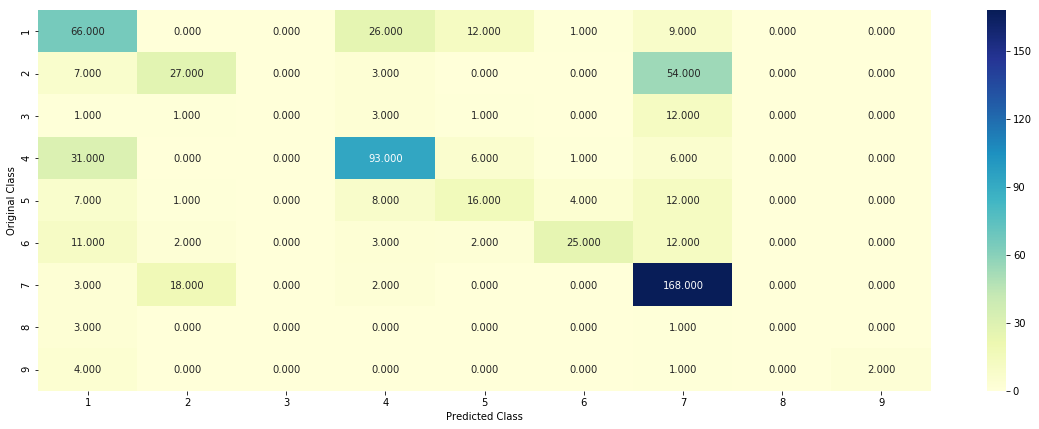

-------------------- Precision matrix (Columm Sum=1) --------------------


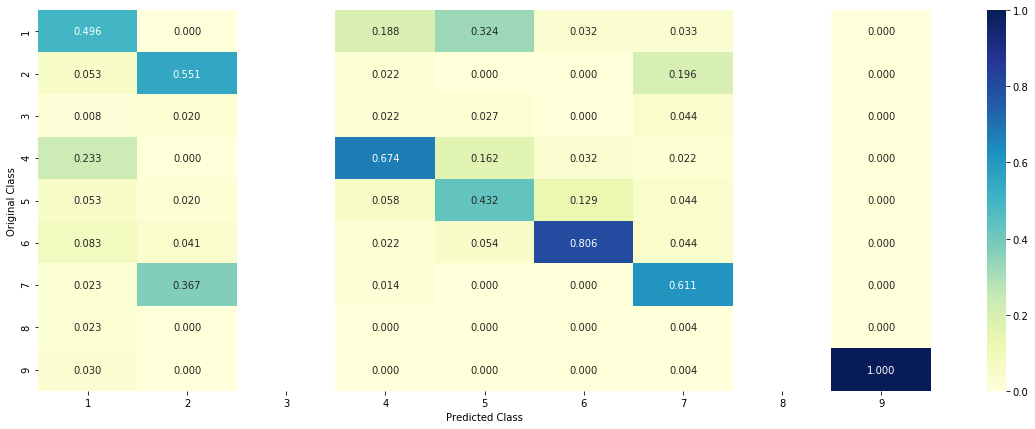

-------------------- Recall matrix (Row sum=1) --------------------


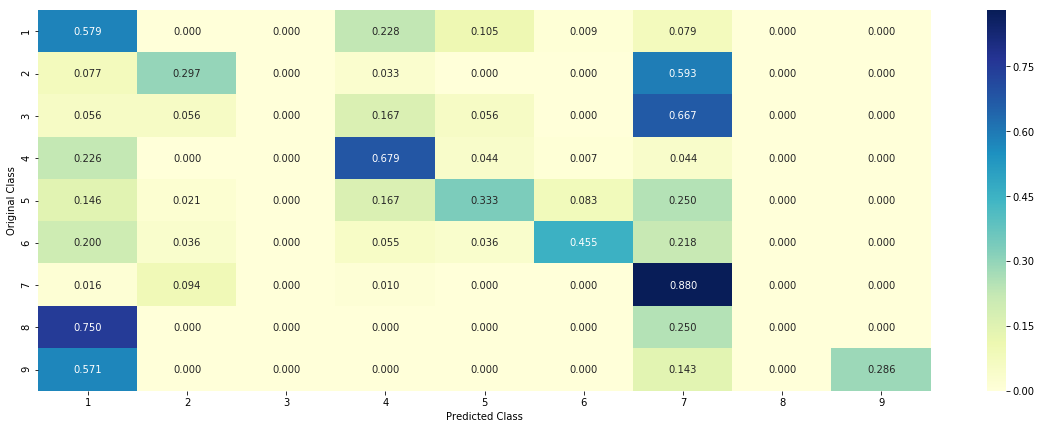

In [52]:
# Assignment

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]

clf = GridSearchCV(MultinomialNB(), param_grid={'alpha' : alpha},\
                   n_jobs=-1, scoring='neg_log_loss', refit=True)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(test_x_tfidf)
print("The test log loss is:",\
      log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))

plot_confusion_matrix(y_test, sig_clf.predict(test_x_tfidf.toarray()))

In [82]:
# Assignment
pp.pprint(sig_clf.base_estimator.cv_results_)

{'mean_fit_time': array([0.11604158, 0.08334835, 0.07155244, 0.08854938, 0.052085  ,
       0.03645905, 0.03644713, 0.03645881]),
 'mean_score_time': array([0.00520873, 0.01562548, 0.015625  , 0.        , 0.        ,
       0.010427  , 0.00520841, 0.00520841]),
 'mean_test_score': array([-1.85579555, -1.68881614, -1.52066402, -1.1602142 , -1.48154442,
       -1.53962482, -1.73041017, -1.81905289]),
 'mean_train_score': array([-0.02713414, -0.02771752, -0.03288097, -0.24071685, -1.03736004,
       -1.42952386, -1.71353422, -1.81719764]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'alpha': 1e-05},
            {'alpha': 0.0001},
            {'alpha': 0.001},
            {'alpha': 0.1},
            {'alpha': 1},
            {'alpha': 10},
            {'alpha': 100},
            {'alpha': 1000}],
 'rank_test_score': 

<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.3509235125982695
Number of missclassified point : 0.44360902255639095
-------------------- Confusion matrix --------------------


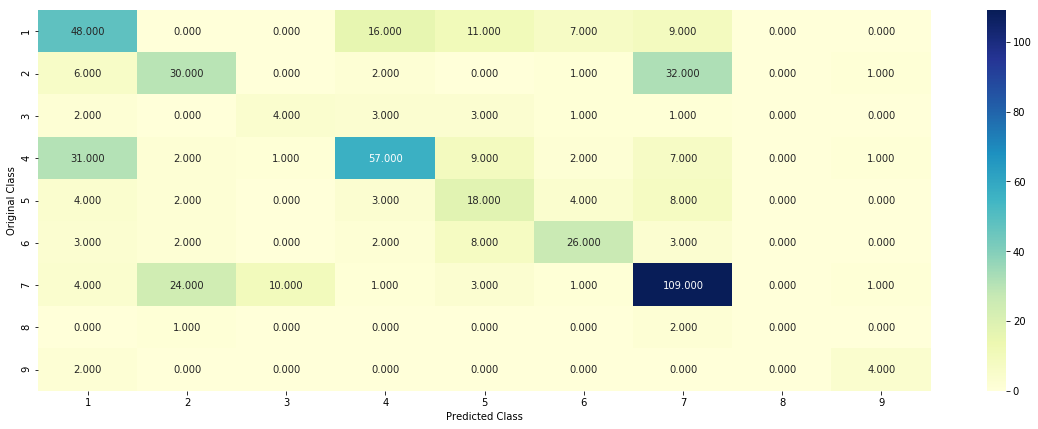

-------------------- Precision matrix (Columm Sum=1) --------------------


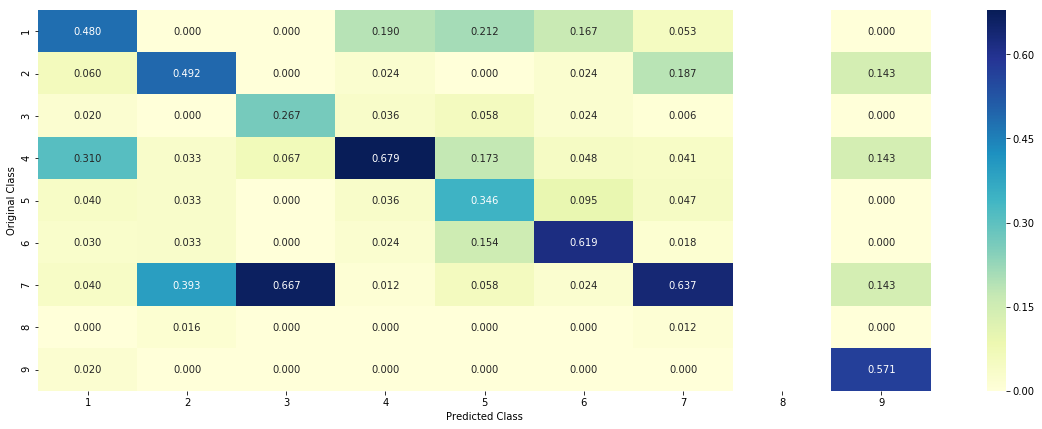

-------------------- Recall matrix (Row sum=1) --------------------


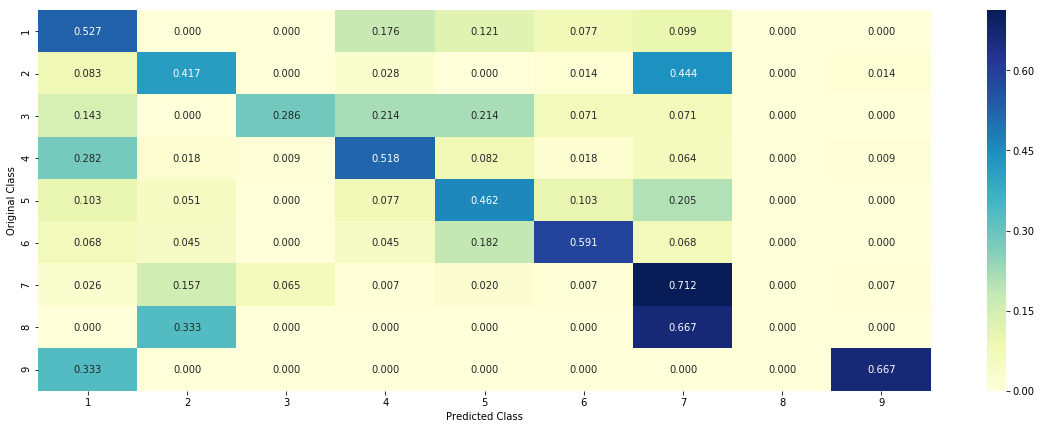

In [69]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [75]:
# Assignment
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
sig_clf.base_estimator.estimator.fit(train_x_tfidf, y_train)
indices = np.argsort(-sig_clf.base_estimator.estimator.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0416 0.0362 0.0192 0.048  0.0344 0.0327 0.7803 0.0043 0.0034]]
Actual Class : 7
--------------------------------------------------
17 Text feature [activation] present in test data point [True]
19 Text feature [activated] present in test data point [True]
20 Text feature [downstream] present in test data point [True]
21 Text feature [kinase] present in test data point [True]
22 Text feature [cells] present in test data point [True]
23 Text feature [inhibitor] present in test data point [True]
24 Text feature [signaling] present in test data point [True]
27 Text feature [also] present in test data point [True]
28 Text feature [expressing] present in test data point [True]
29 Text feature [contrast] present in test data point [True]
30 Text feature [growth] present in test data point [True]
31 Text feature [constitutive] present in test data point [True]
32 Text feature [sensitive] present in test data point [True]
33 Text feature [i

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [76]:
# Assignment
test_point_index = 97
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-sig_clf.base_estimator.estimator.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0482 0.2578 0.0202 0.0555 0.039  0.0379 0.5324 0.0049 0.004 ]]
Actual Class : 2
--------------------------------------------------
17 Text feature [activation] present in test data point [True]
19 Text feature [activated] present in test data point [True]
20 Text feature [downstream] present in test data point [True]
21 Text feature [kinase] present in test data point [True]
22 Text feature [cells] present in test data point [True]
23 Text feature [inhibitor] present in test data point [True]
24 Text feature [signaling] present in test data point [True]
27 Text feature [also] present in test data point [True]
28 Text feature [expressing] present in test data point [True]
29 Text feature [contrast] present in test data point [True]
30 Text feature [growth] present in test data point [True]
31 Text feature [constitutive] present in test data point [True]
32 Text feature [sensitive] present in test data point [True]
33 Text feature [i

<h2>4.2. K Nearest Neighbour Classification</h2>

In [179]:
modelList.append("Knn")
featureList.append("ResponseCodingTfidf")
logLossList.append("1.174966")

<h3>4.2.1. Hyper parameter tuning</h3>

The test log loss is: 1.174966059908517
-------------------- Confusion matrix --------------------


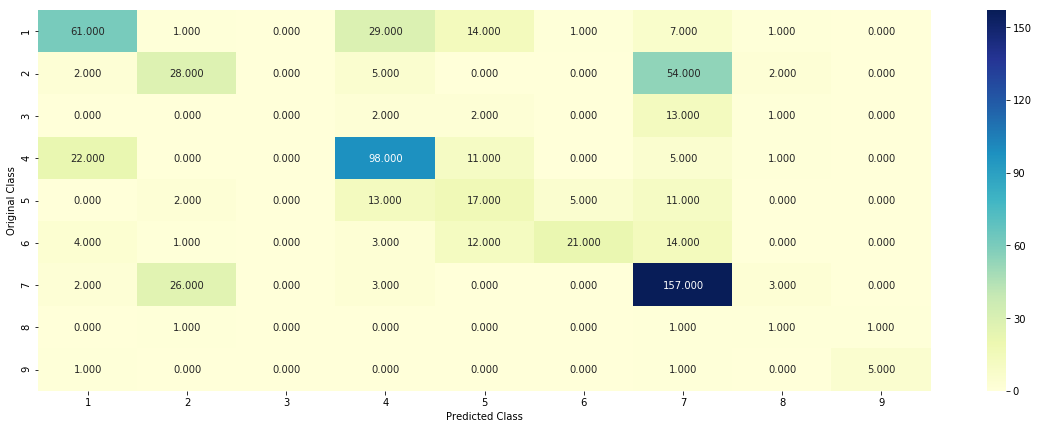

-------------------- Precision matrix (Columm Sum=1) --------------------


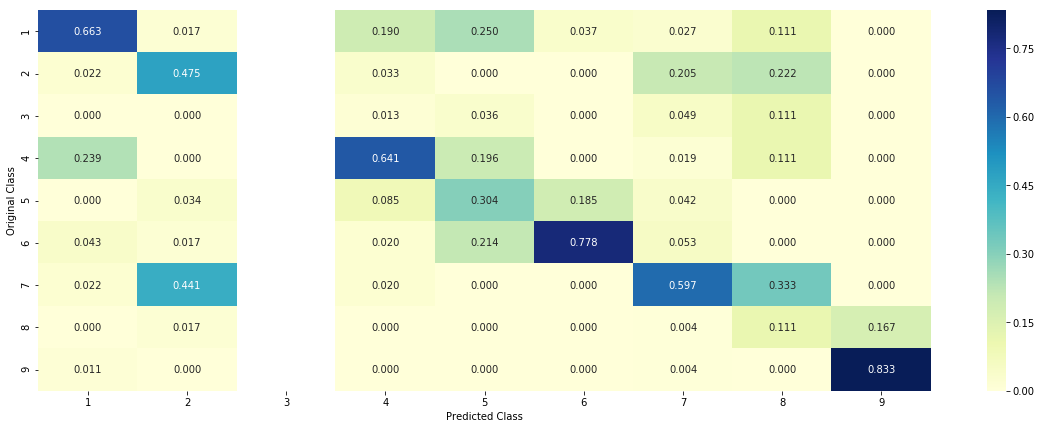

-------------------- Recall matrix (Row sum=1) --------------------


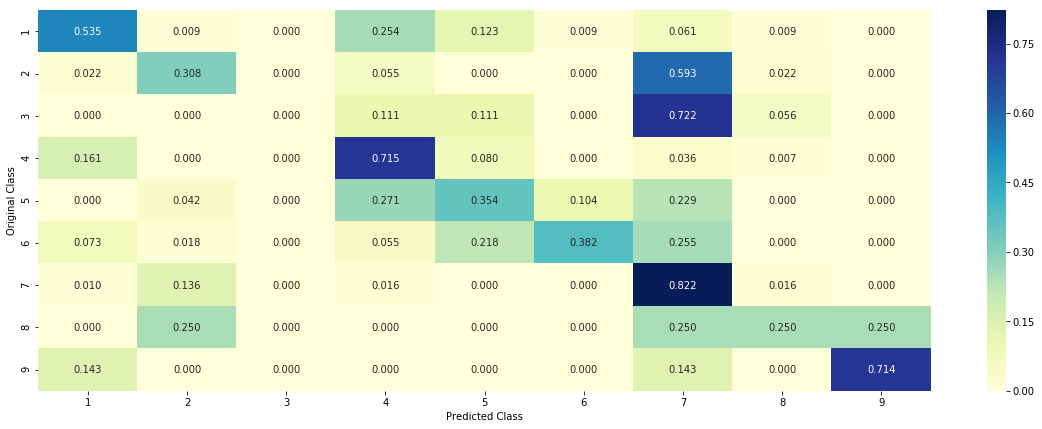

In [112]:
# Assignment

alpha = [5, 11, 15, 21, 31, 41, 51, 99]


clf = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors' : alpha},\
                   n_jobs=-1, scoring='neg_log_loss', refit=True)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(test_x_responseCoding)
print("The test log loss is:",\
      log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))

plot_confusion_matrix(y_test, sig_clf.predict(test_x_responseCoding))

<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.1002748803755749
Number of mis-classified points : 0.3966165413533835
-------------------- Confusion matrix --------------------


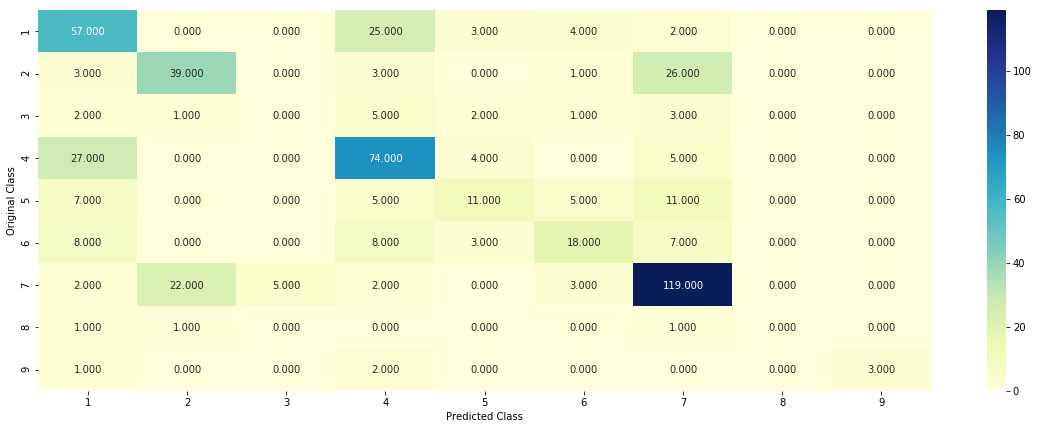

-------------------- Precision matrix (Columm Sum=1) --------------------


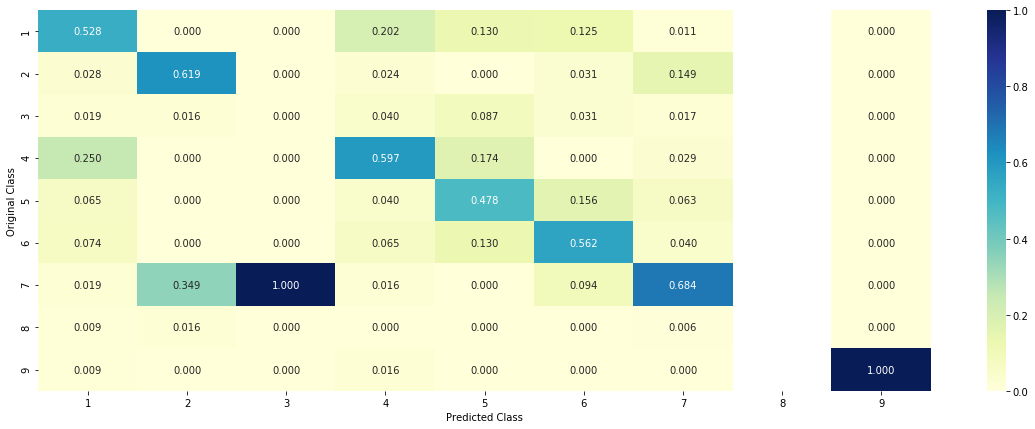

-------------------- Recall matrix (Row sum=1) --------------------


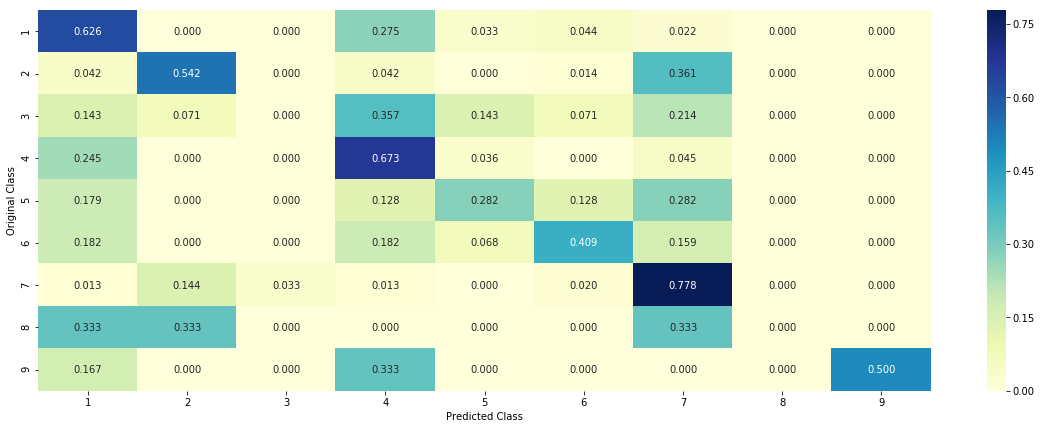

In [102]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [103]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 7
The  15  nearest neighbours of the test points belongs to classes [7 7 7 6 6 7 6 7 6 7 7 7 7 7 6]
Fequency of nearest points : Counter({7: 10, 6: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [104]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 7
the k value for knn is 15 and the nearest neighbours of the test points belongs to classes [2 7 5 7 7 2 7 7 7 2 7 7 7 7 7]
Fequency of nearest points : Counter({7: 11, 2: 3, 5: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

In [182]:
modelList.append("LogisticRegression")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.03558")

<h4>4.3.1.1. Hyper paramter tuning</h4>

The test log loss is: 1.0355881355256242
-------------------- Confusion matrix --------------------


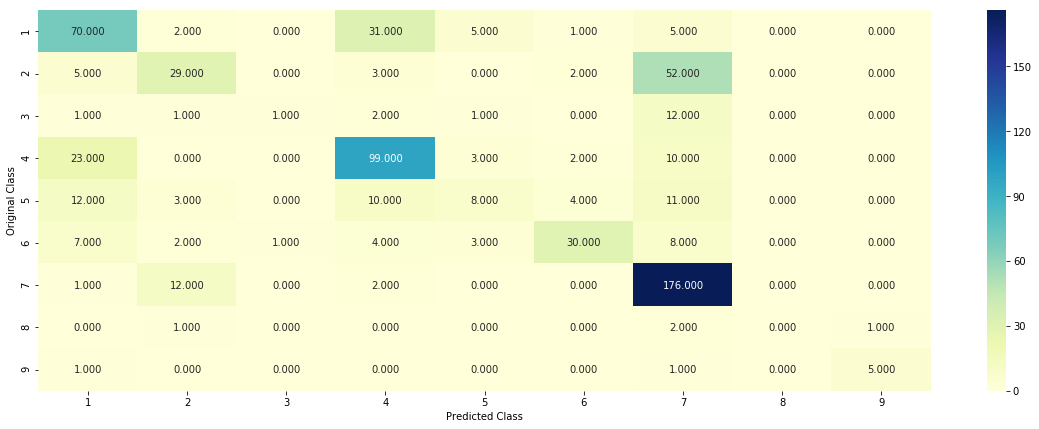

-------------------- Precision matrix (Columm Sum=1) --------------------


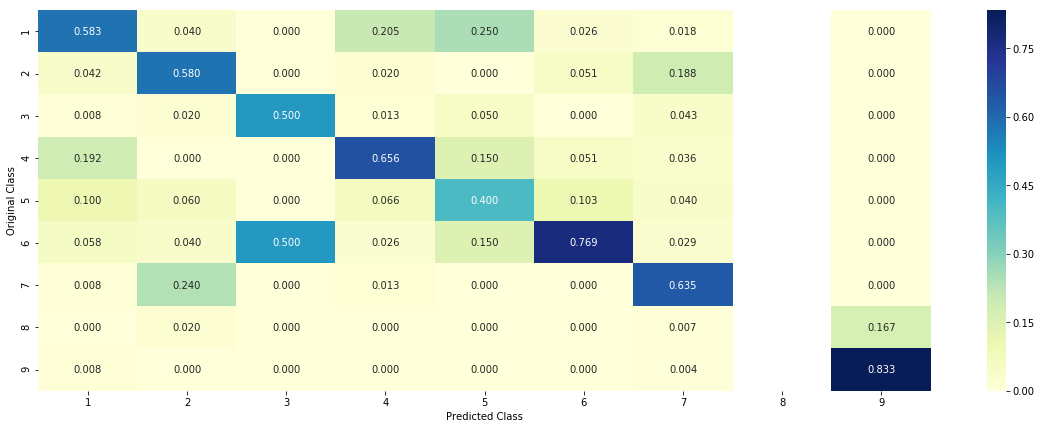

-------------------- Recall matrix (Row sum=1) --------------------


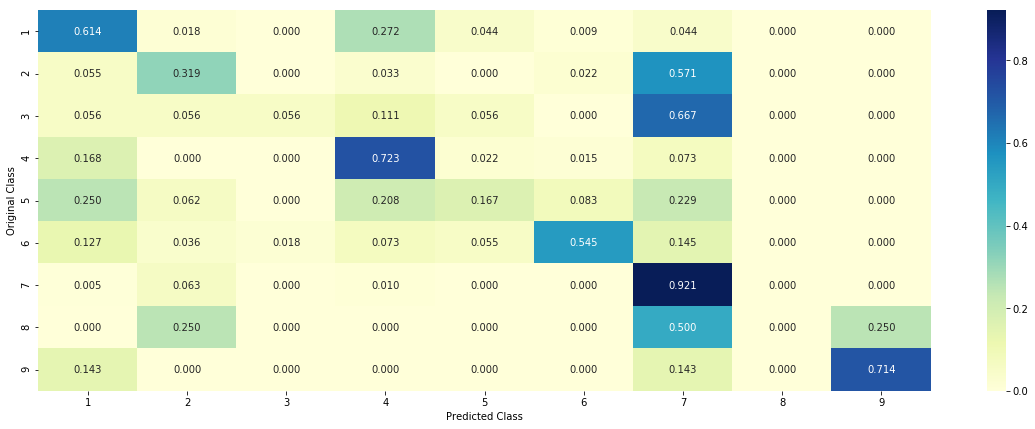

In [114]:
# Assignment

alpha = [10 ** x for x in range(-6, 3)]

clf = GridSearchCV(SGDClassifier(class_weight='balanced', penalty='l2', loss='log', random_state=42),\
                   param_grid={'alpha' : alpha},\
                   n_jobs=-1, scoring='neg_log_loss', refit=True)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(test_x_tfidf)
print("The test log loss is:",\
      log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))

plot_confusion_matrix(y_test, sig_clf.predict(test_x_tfidf.toarray()))

In [119]:
#Assignment
clf.estimator

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

for alpha = 1e-06
Log Loss : 1.5538887290488432
for alpha = 1e-05
Log Loss : 1.5555528921393587
for alpha = 0.0001
Log Loss : 1.5606721143951625
for alpha = 0.001
Log Loss : 1.5204015078591973
for alpha = 0.01
Log Loss : 1.2740952416502813
for alpha = 0.1
Log Loss : 1.248108238558504
for alpha = 1
Log Loss : 1.3322693915601265
for alpha = 10
Log Loss : 1.3948421027382327
for alpha = 100
Log Loss : 1.4049529678918191


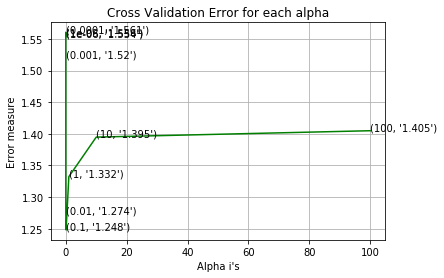

For values of best alpha =  0.1 The train log loss is: 0.8269826488015911
For values of best alpha =  0.1 The cross validation log loss is: 0.8257203343858037
For values of best alpha =  0.1 The test log loss is: 1.2942187738410216
-------------------- Confusion matrix --------------------


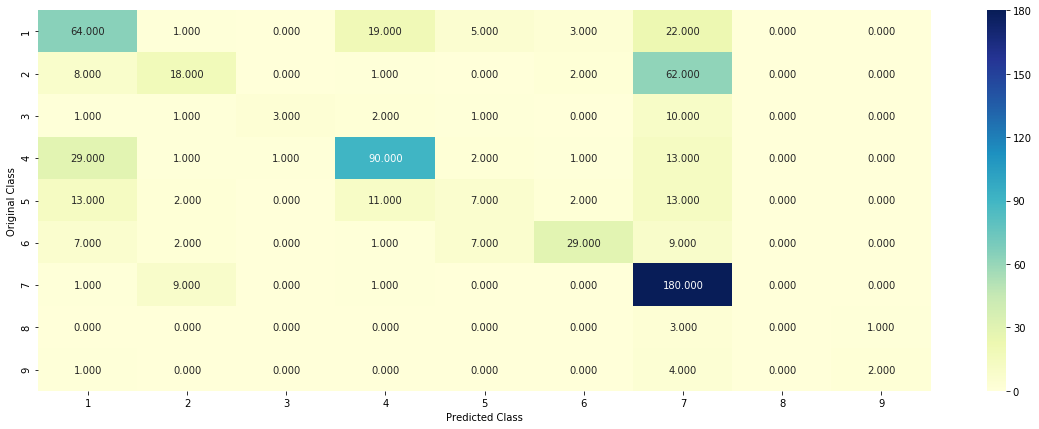

-------------------- Precision matrix (Columm Sum=1) --------------------


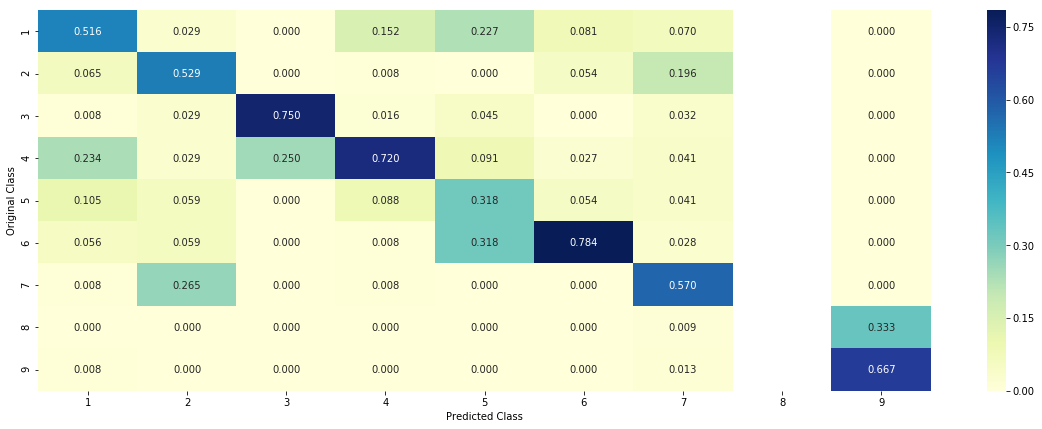

-------------------- Recall matrix (Row sum=1) --------------------


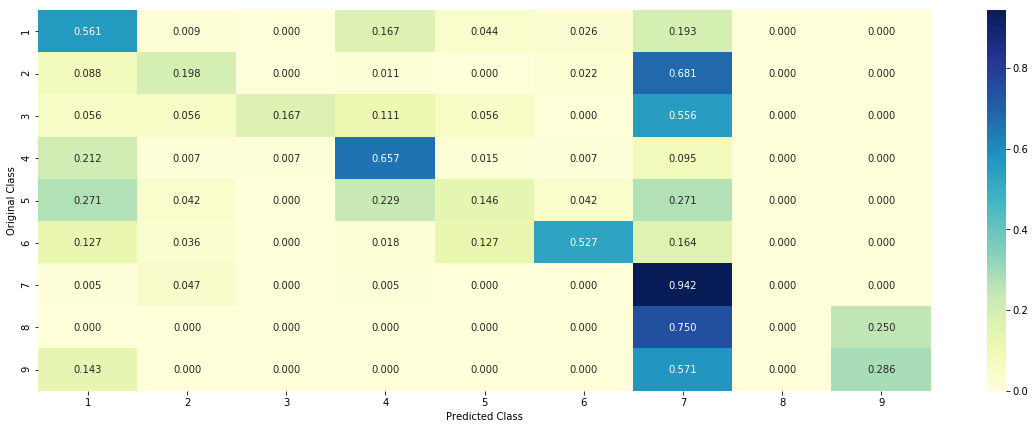

In [175]:
# Assignment
# Bigram

bg_train_x, bg_cv_x, bg_train_y, bg_cv_y =  train_test_split(train_x_bigram, train_y, stratify=train_y, test_size=0.2)

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(bg_train_x, bg_train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(bg_train_x, bg_train_y)
    sig_clf_probs = sig_clf.predict_proba(bg_cv_x)
    cv_log_error_array.append(log_loss(bg_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(bg_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_bigram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_bigram, train_y)

predict_y = sig_clf.predict_proba(bg_train_x)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",\
      log_loss(bg_train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(bg_cv_x)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",\
      log_loss(bg_cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",\
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

plot_confusion_matrix(y_test, sig_clf.predict(test_x_bigram.toarray()))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.217324457704446
Number of mis-classified points : 0.38345864661654133
-------------------- Confusion matrix --------------------


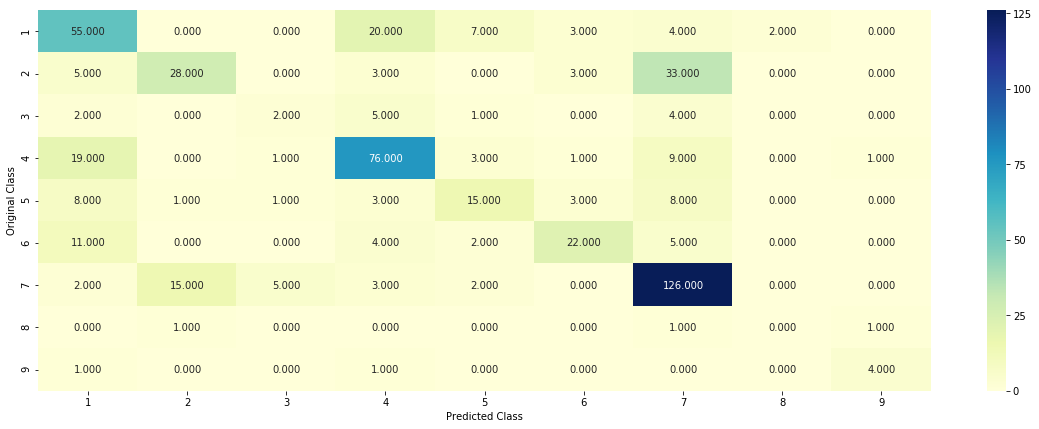

-------------------- Precision matrix (Columm Sum=1) --------------------


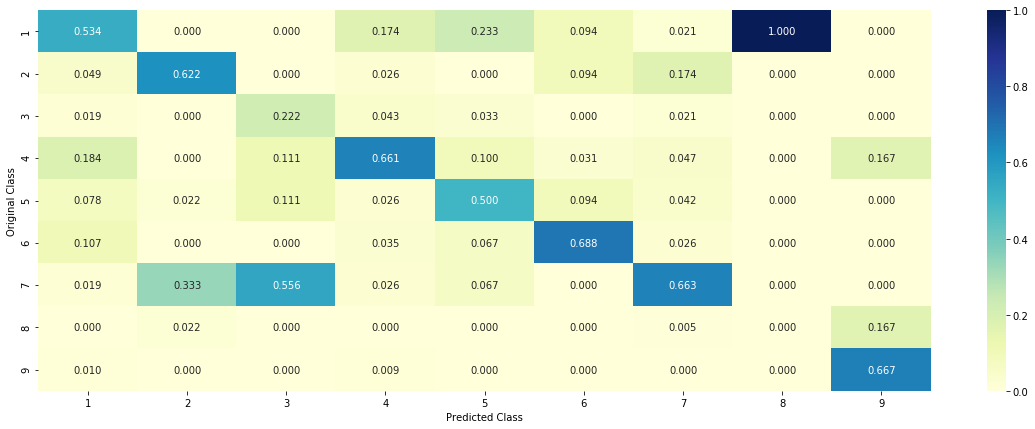

-------------------- Recall matrix (Row sum=1) --------------------


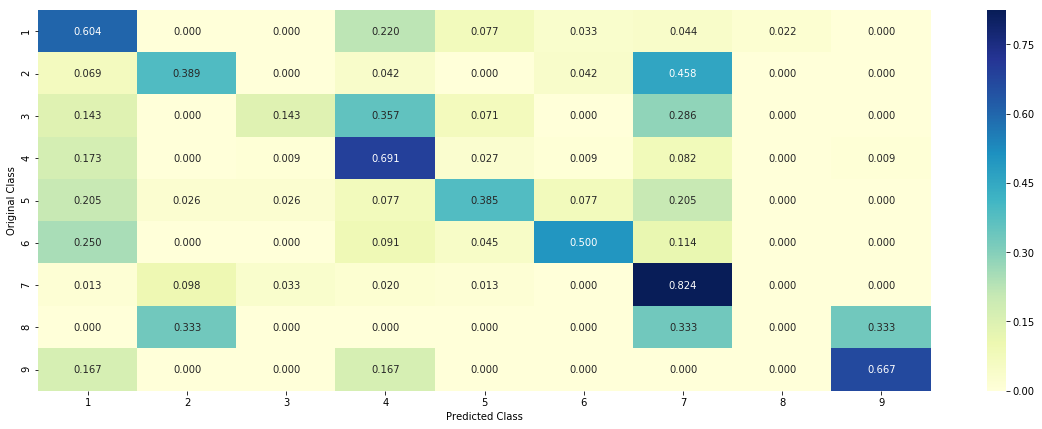

In [77]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [115]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

In [116]:
def get_imp_feature_names_tfidf(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features_tfidf[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features_tfidf[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [120]:
#Assignment
clf.estimator.fit(train_x_tfidf, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [124]:
# Assignment
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.estimator.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],\
                     test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0083 0.0163 0.0801 0.0107 0.0435 0.0057 0.8332 0.0015 0.0009]]
Actual Class : 7
--------------------------------------------------
7 Text feature [downstream] present in test data point [True]
9 Text feature [constitutive] present in test data point [True]
13 Text feature [activation] present in test data point [True]
28 Text feature [oncogene] present in test data point [True]
33 Text feature [activated] present in test data point [True]
36 Text feature [oncogenic] present in test data point [True]
41 Text feature [bone] present in test data point [True]
46 Text feature [inhibited] present in test data point [True]
47 Text feature [3b] present in test data point [True]
55 Text feature [codon] present in test data point [True]
61 Text feature [signaling] present in test data point [True]
62 Text feature [transforming] present in test data point [True]
80 Text feature [3t3] present in test data point [True]
96 Text feature [erk] pre

In [79]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0045 0.1905 0.0012 0.0012 0.0047 0.0014 0.7872 0.0076 0.0017]]
Actual Class : 7
--------------------------------------------------
23 Text feature [constitutively] present in test data point [True]
39 Text feature [flt1] present in test data point [True]
79 Text feature [oncogene] present in test data point [True]
80 Text feature [oncogenes] present in test data point [True]
84 Text feature [cysteine] present in test data point [True]
89 Text feature [inhibited] present in test data point [True]
137 Text feature [technology] present in test data point [True]
160 Text feature [dramatic] present in test data point [True]
162 Text feature [gaiix] present in test data point [True]
166 Text feature [ligand] present in test data point [True]
177 Text feature [downstream] present in test data point [True]
181 Text feature [concentrations] present in test data point [True]
182 Text feature [thyroid] present in test data point [True]
187 Te

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [129]:
#Assignment
test_point_index = 98
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.estimator.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.1996 0.0051 0.002  0.1222 0.2663 0.4001 0.0023 0.0017 0.0006]]
Actual Class : 5
--------------------------------------------------
79 Text feature [values] present in test data point [True]
103 Text feature [ring] present in test data point [True]
108 Text feature [brca] present in test data point [True]
114 Text feature [reduction] present in test data point [True]
129 Text feature [substitutions] present in test data point [True]
133 Text feature [significant] present in test data point [True]
135 Text feature [enzyme] present in test data point [True]
136 Text feature [interaction] present in test data point [True]
137 Text feature [conformation] present in test data point [True]
138 Text feature [degradation] present in test data point [True]
141 Text feature [models] present in test data point [True]
147 Text feature [ovarian] present in test data point [True]
148 Text feature [basis] present in test data point [True]
151 Text

439 Text feature [75] present in test data point [True]
440 Text feature [differences] present in test data point [True]
441 Text feature [rates] present in test data point [True]
442 Text feature [30] present in test data point [True]
445 Text feature [2006] present in test data point [True]
446 Text feature [residues] present in test data point [True]
447 Text feature [strand] present in test data point [True]
450 Text feature [mechanism] present in test data point [True]
453 Text feature [ml] present in test data point [True]
454 Text feature [38] present in test data point [True]
455 Text feature [46] present in test data point [True]
456 Text feature [gel] present in test data point [True]
457 Text feature [45] present in test data point [True]
458 Text feature [terminal] present in test data point [True]
459 Text feature [35] present in test data point [True]
460 Text feature [56] present in test data point [True]
461 Text feature [variant] present in test data point [True]
462 T

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.4395190222240433
for alpha = 1e-05
Log Loss : 1.4613951945118617
for alpha = 0.0001
Log Loss : 1.392640595913179
for alpha = 0.001
Log Loss : 1.2521811628755943
for alpha = 0.01
Log Loss : 1.349151219922669
for alpha = 0.1
Log Loss : 1.457591708320943
for alpha = 1
Log Loss : 1.5902258764770603


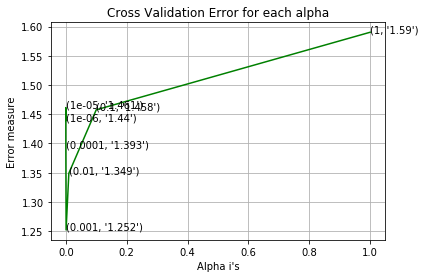

For values of best alpha =  0.001 The train log loss is: 0.6257422677412771
For values of best alpha =  0.001 The cross validation log loss is: 1.2521811628755943
For values of best alpha =  0.001 The test log loss is: 1.1306020069615057


In [81]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.2521811628755943
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


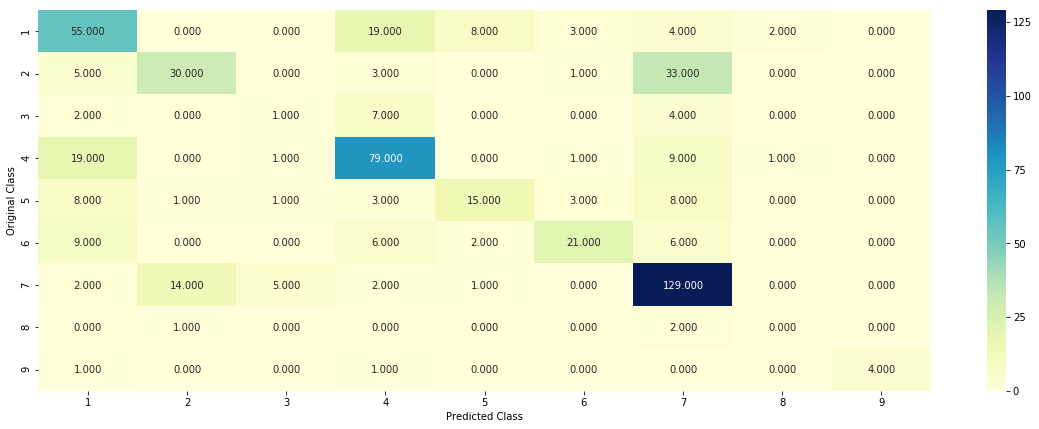

-------------------- Precision matrix (Columm Sum=1) --------------------


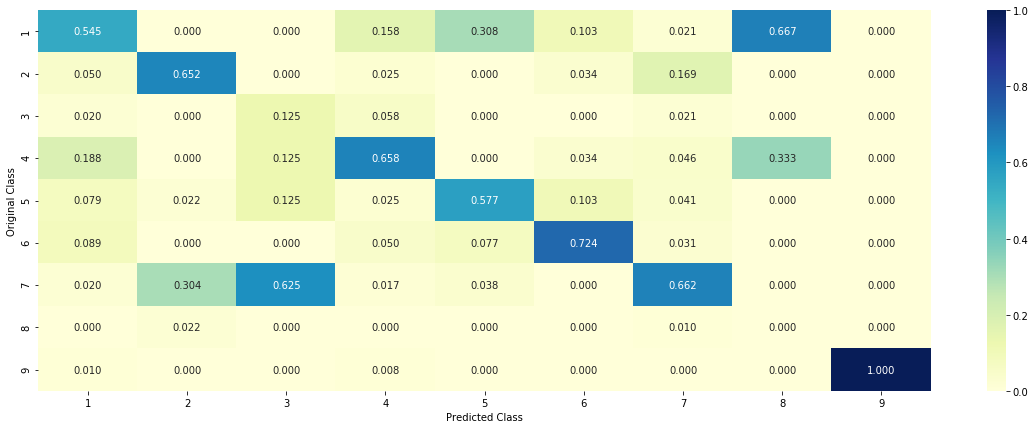

-------------------- Recall matrix (Row sum=1) --------------------


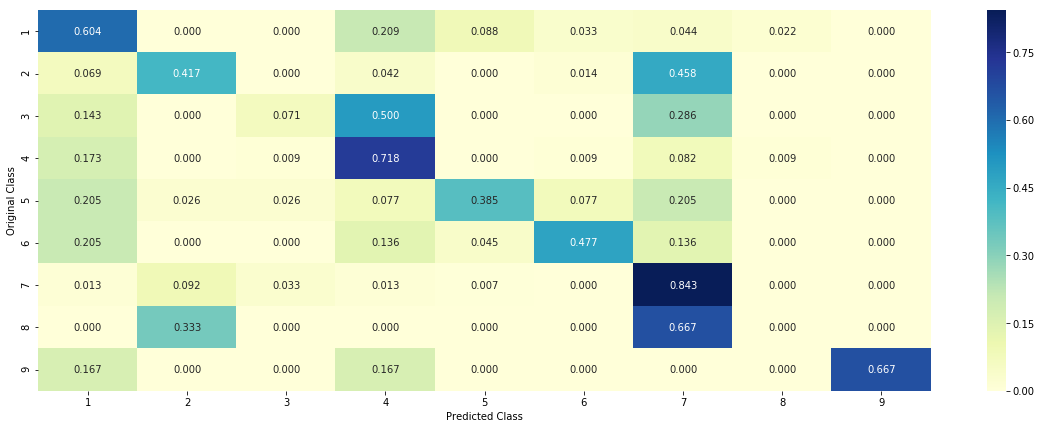

In [82]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [83]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.100e-03 1.255e-01 2.000e-04 1.300e-03 2.300e-03 1.400e-03 8.556e-01
  8.500e-03 1.000e-04]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
107 Text feature [flt1] present in test data point [True]
124 Text feature [cysteine] present in test data point [True]
157 Text feature [oncogenes] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
195 Text feature [activating] present in test data point [True]
200 Text feature [ligand] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
204 Text feature [technology] present in test data point [True]
257 Text feature [gaiix] present in test data point [True]
260 Text feature [concentrations] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
314 Text feature [hki] present 

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [84]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0485 0.1851 0.0052 0.0442 0.0617 0.0143 0.6317 0.0072 0.0022]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
89 Text feature [constitutive] present in test data point [True]
116 Text feature [activated] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
159 Text feature [transforming] present in test data point [True]
193 Text feature [receptors] present in test data point [True]
195 Text feature [activating] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
226 Text feature [transform] present in test data point [True]
241 Text feature [isozyme] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
377 Text feature [agar] present in test data point [True]
442 Text feature [interatomic] present in test data poi

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.1924059852748647
for C = 0.0001
Log Loss : 1.114684461409175
for C = 0.001
Log Loss : 1.1485131006251346
for C = 0.01
Log Loss : 1.3113934187155065
for C = 0.1
Log Loss : 1.5860909511164532
for C = 1
Log Loss : 1.6458264221014562
for C = 10
Log Loss : 1.6458263660801906
for C = 100
Log Loss : 1.6458263755733193


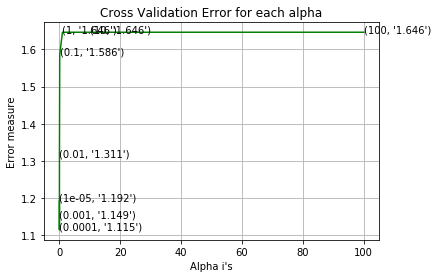

For values of best alpha =  0.0001 The train log loss is: 0.46674361876476494
For values of best alpha =  0.0001 The cross validation log loss is: 0.45425223101399004
For values of best alpha =  0.0001 The test log loss is: 1.0973723000338884


In [134]:
#Assignment

svm_train_x, svm_cv_x, svm_train_y, svm_cv_y =  train_test_split(train_x_tfidf, train_y, stratify=train_y, test_size=0.2)

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(svm_train_x, svm_train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(svm_train_x, svm_train_y)
    sig_clf_probs = sig_clf.predict_proba(svm_cv_x)
    cv_log_error_array.append(log_loss(svm_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(svm_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(svm_train_x)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(svm_train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svm_cv_x)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(svm_cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [190]:
modelList.append("LinearSVC")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.0973723")

-------------------- Confusion matrix --------------------


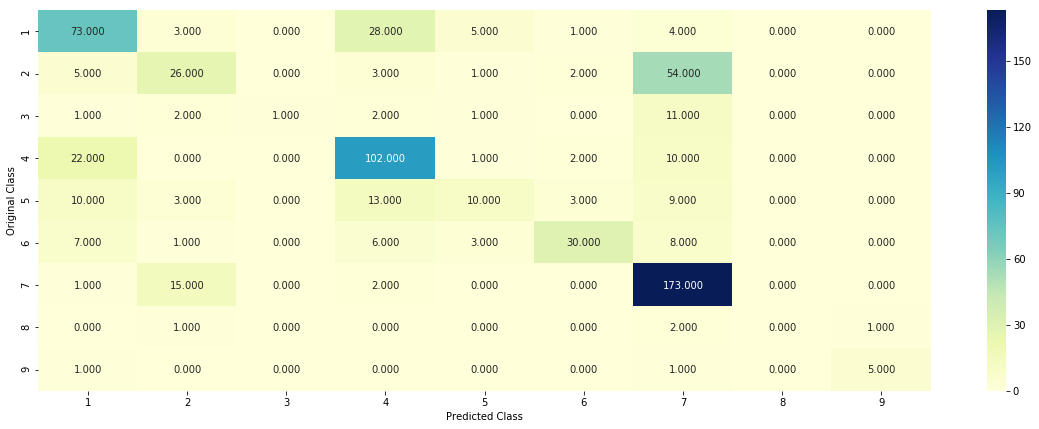

-------------------- Precision matrix (Columm Sum=1) --------------------


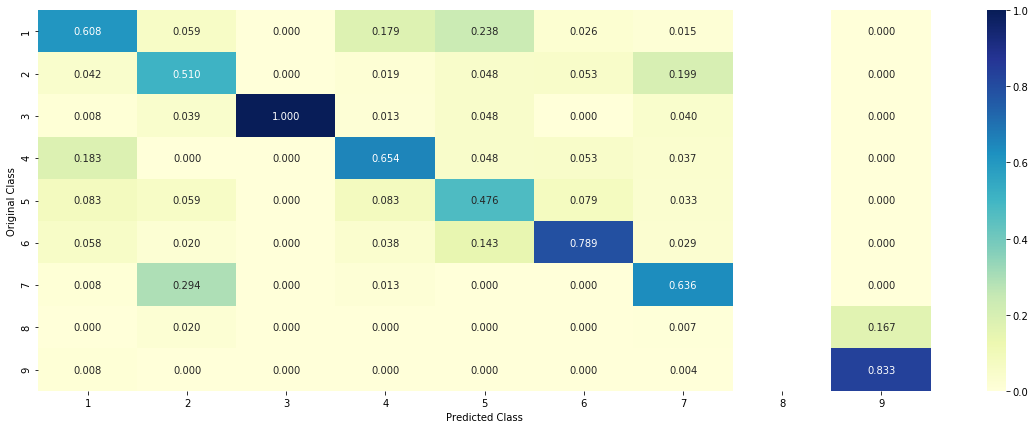

-------------------- Recall matrix (Row sum=1) --------------------


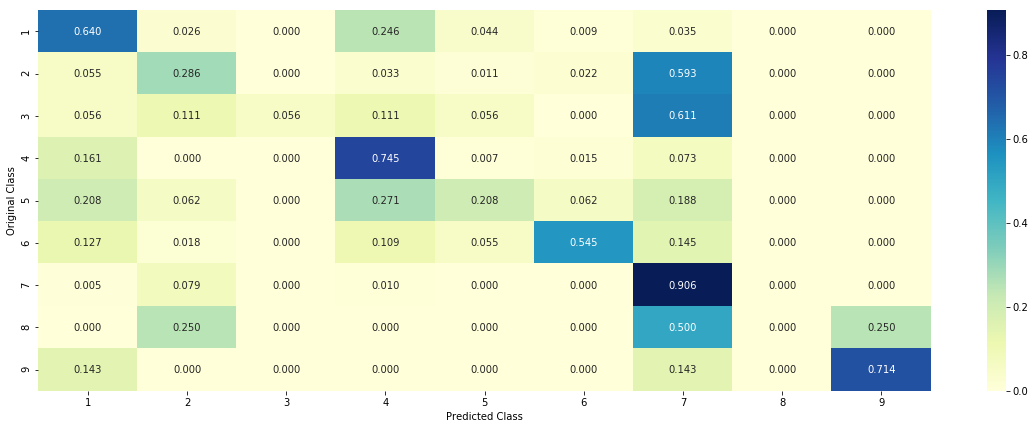

In [135]:
# Assignment
plot_confusion_matrix(y_test, sig_clf.predict(test_x_tfidf.toarray()))

for C = 1e-05
Log Loss : 1.4456349250609233
for C = 0.0001
Log Loss : 1.4117883301099556
for C = 0.001
Log Loss : 1.3818342037841624
for C = 0.01
Log Loss : 1.2442964974823838
for C = 0.1
Log Loss : 1.5346828298587332
for C = 1
Log Loss : 1.722800653929441
for C = 10
Log Loss : 1.7286360420759161
for C = 100
Log Loss : 1.7286184454094997


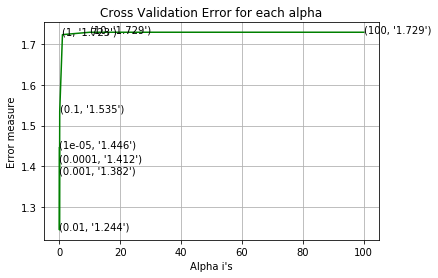

For values of best alpha =  0.01 The train log loss is: 0.7628309867716067
For values of best alpha =  0.01 The cross validation log loss is: 1.2442964974823838
For values of best alpha =  0.01 The test log loss is: 1.1541891969863685


In [85]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.2442964974823838
Number of mis-classified points : 0.39473684210526316
-------------------- Confusion matrix --------------------


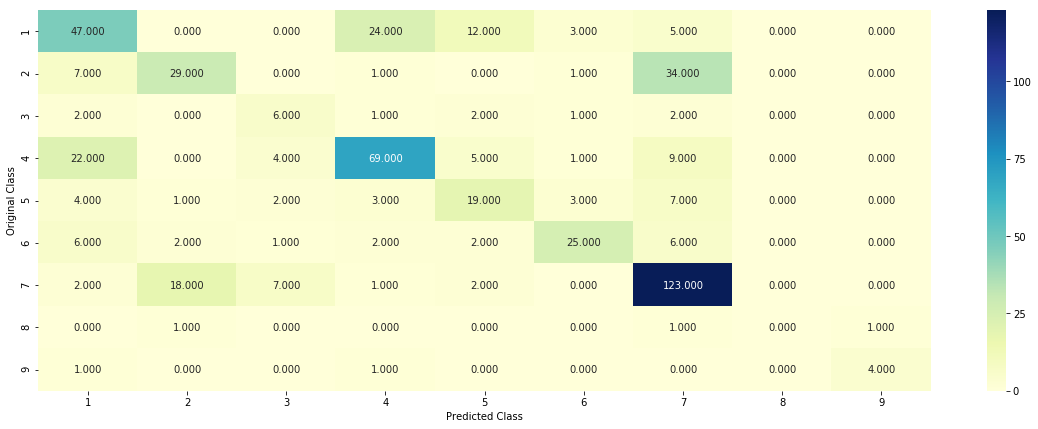

-------------------- Precision matrix (Columm Sum=1) --------------------


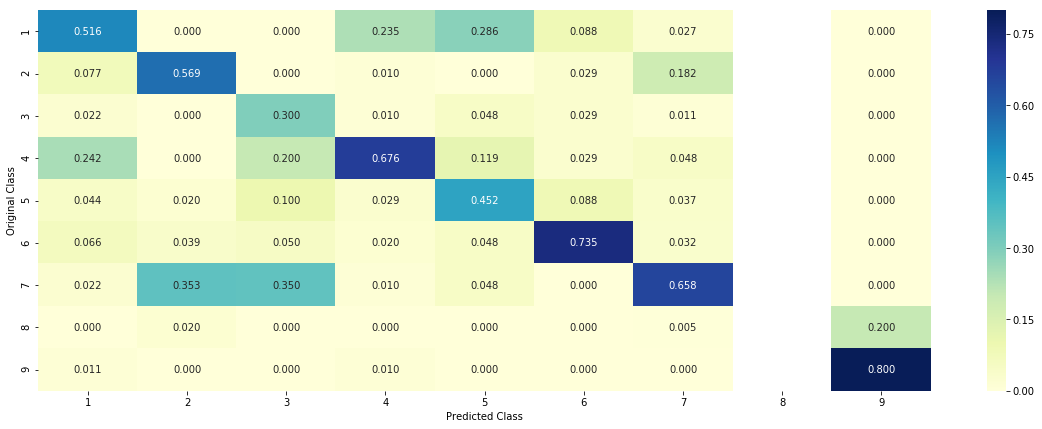

-------------------- Recall matrix (Row sum=1) --------------------


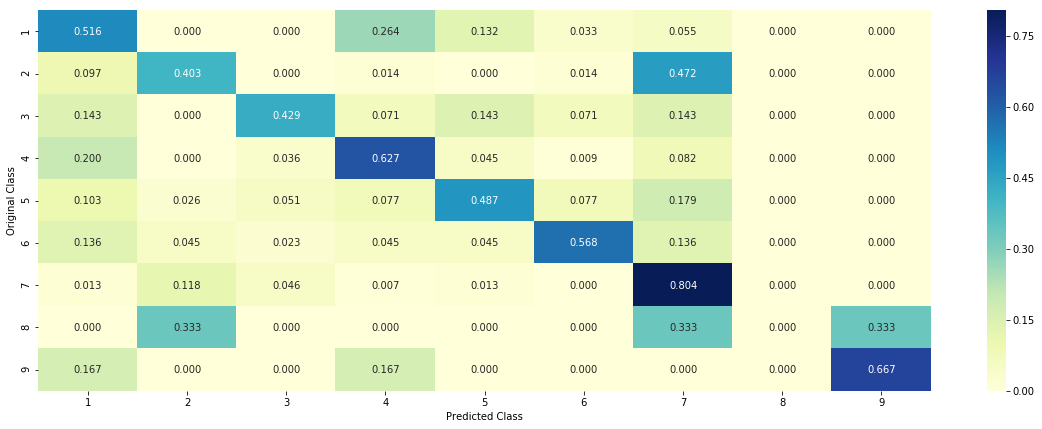

In [86]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [87]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0153 0.1199 0.0029 0.0151 0.0121 0.0075 0.8104 0.0129 0.0039]]
Actual Class : 7
--------------------------------------------------
28 Text feature [constitutively] present in test data point [True]
29 Text feature [cysteine] present in test data point [True]
49 Text feature [cdnas] present in test data point [True]
76 Text feature [flt1] present in test data point [True]
79 Text feature [concentrations] present in test data point [True]
82 Text feature [gaiix] present in test data point [True]
96 Text feature [technology] present in test data point [True]
101 Text feature [inhibited] present in test data point [True]
104 Text feature [activating] present in test data point [True]
114 Text feature [oncogenes] present in test data point [True]
147 Text feature [expressing] present in test data point [True]
150 Text feature [mapk] present in test data point [True]
151 Text feature [oncogene] present in test data point [True]
169 Text 

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [88]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0786 0.1516 0.0146 0.1064 0.1105 0.0323 0.4839 0.0128 0.0094]]
Actual Class : 7
--------------------------------------------------
28 Text feature [constitutively] present in test data point [True]
40 Text feature [constitutive] present in test data point [True]
73 Text feature [activated] present in test data point [True]
75 Text feature [transforming] present in test data point [True]
94 Text feature [receptors] present in test data point [True]
97 Text feature [exchange] present in test data point [True]
101 Text feature [inhibited] present in test data point [True]
104 Text feature [activating] present in test data point [True]
151 Text feature [oncogene] present in test data point [True]
231 Text feature [transform] present in test data point [True]
255 Text feature [activation] present in test data point [True]
279 Text feature [downstream] present in test data point [True]
440 Text feature [doubled] present in test data poin

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [137]:
# Assignment

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(svm_train_x, svm_train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(svm_train_x, svm_train_y)
        sig_clf_probs = sig_clf.predict_proba(svm_cv_x)
        cv_log_error_array.append(log_loss(svm_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(svm_cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(svm_train_x, svm_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(svm_train_x, svm_train_y)

predict_y = sig_clf.predict_proba(svm_train_x)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(svm_train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svm_cv_x)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(svm_cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.1430867985965356
for n_estimators = 100 and max depth =  10
Log Loss : 1.1064858532101525
for n_estimators = 200 and max depth =  5
Log Loss : 1.13790969921553
for n_estimators = 200 and max depth =  10
Log Loss : 1.100749925851346
for n_estimators = 500 and max depth =  5
Log Loss : 1.127781778264491
for n_estimators = 500 and max depth =  10
Log Loss : 1.0963390573669343
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1261249615338023
for n_estimators = 1000 and max depth =  10
Log Loss : 1.096968519710118
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1272184200067288
for n_estimators = 2000 and max depth =  10
Log Loss : 1.097414917458615
For values of best estimator =  500 The train log loss is: 0.5680407299696637
For values of best estimator =  500 The cross validation log loss is: 1.0963390573669343
For values of best estimator =  500 The test log loss is: 1.26702150241641


In [184]:
modelList.append("RandomForest")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.26702")

-------------------- Confusion matrix --------------------


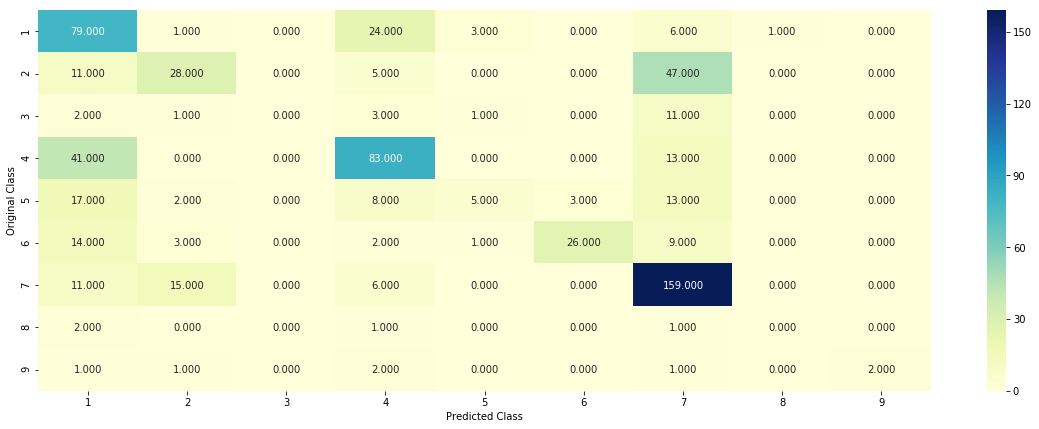

-------------------- Precision matrix (Columm Sum=1) --------------------


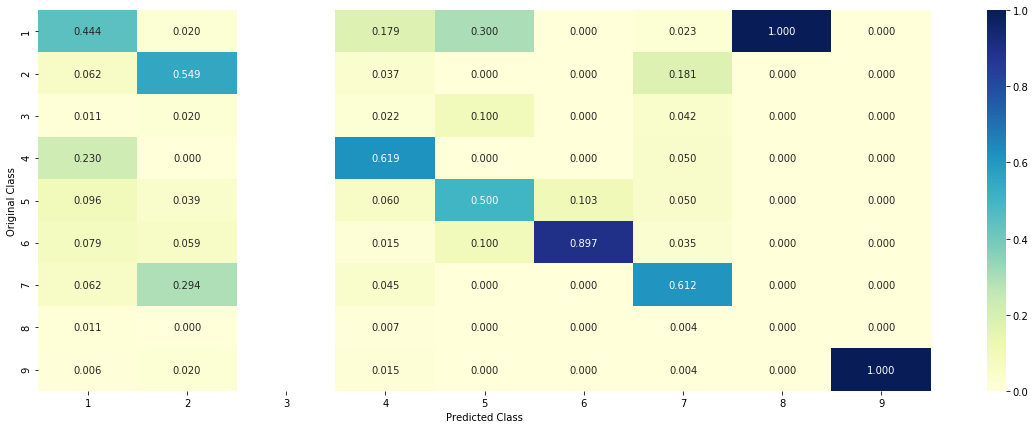

-------------------- Recall matrix (Row sum=1) --------------------


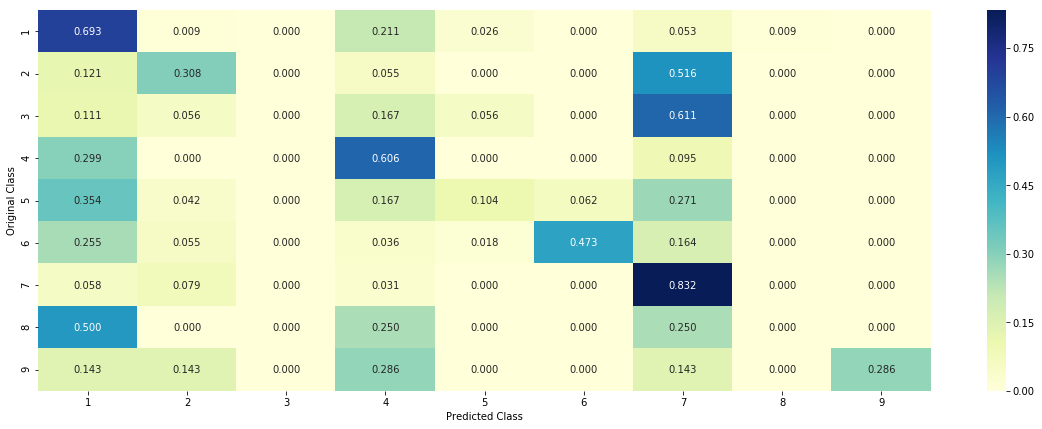

In [138]:
# Assignment
plot_confusion_matrix(y_test, sig_clf.predict(test_x_tfidf.toarray()))

In [89]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2572535683354957
for n_estimators = 100 and max depth =  10
Log Loss : 1.1868414223711878
for n_estimators = 200 and max depth =  5
Log Loss : 1.2378734502517341
for n_estimators = 200 and max depth =  10
Log Loss : 1.1811031780258958
for n_estimators = 500 and max depth =  5
Log Loss : 1.2368241894319212
for n_estimators = 500 and max depth =  10
Log Loss : 1.176754594516683
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2357829533963691
for n_estimators = 1000 and max depth =  10
Log Loss : 1.174993079576866
for n_estimators = 2000 and max depth =  5
Log Loss : 1.236042392554891
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1759745074379755
For values of best estimator =  1000 The train log loss is: 0.7095396732082752
For values of best estimator =  1000 The cross validation log loss is: 1.174993079576866
For values of best estimator =  1000 The test log loss is: 1.1630923149103904


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.174993079576866
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


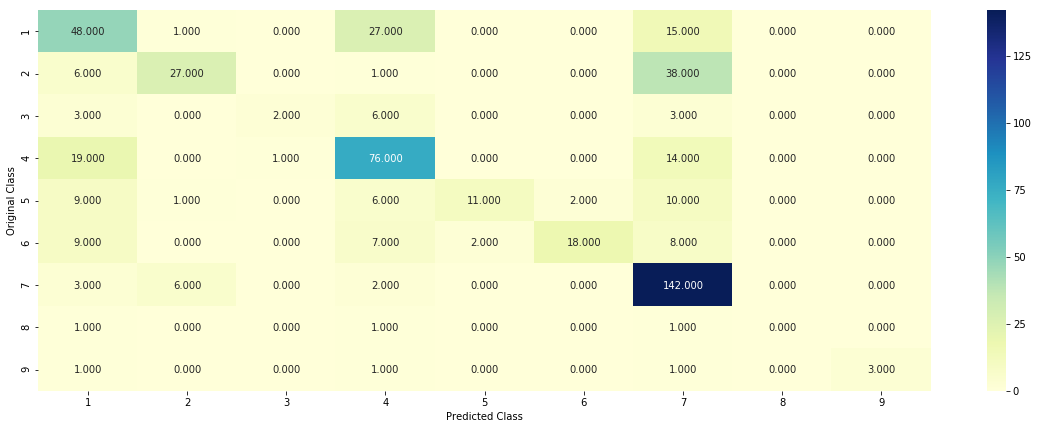

-------------------- Precision matrix (Columm Sum=1) --------------------


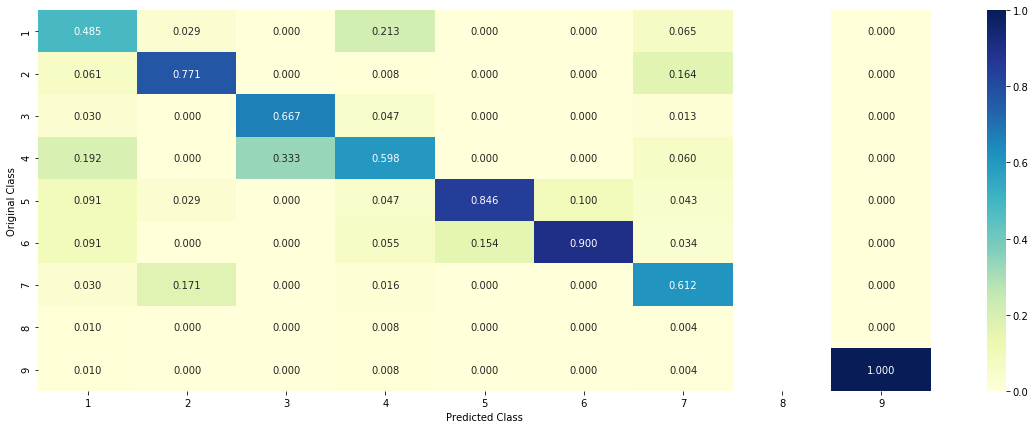

-------------------- Recall matrix (Row sum=1) --------------------


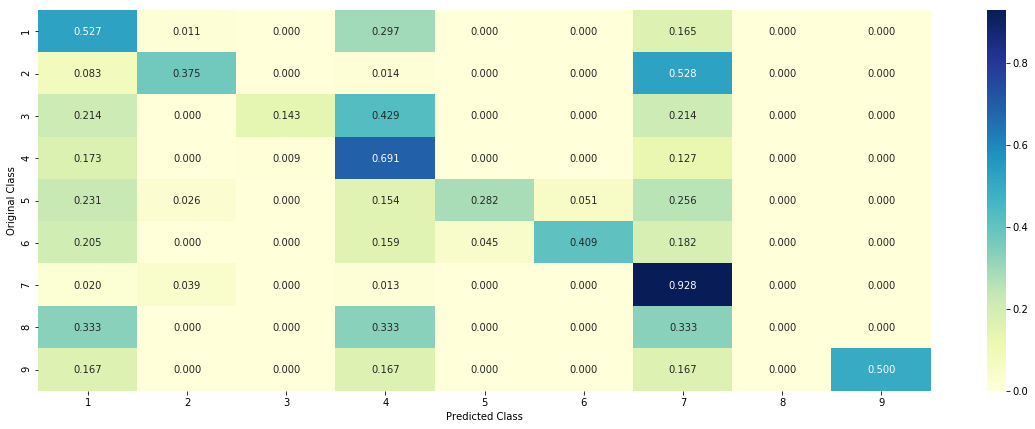

In [90]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [139]:
# Assignment
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0796 0.0918 0.05   0.072  0.0565 0.0437 0.5936 0.0059 0.0068]]
Actual Class : 7
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
2 Text feature [activation] present in test data point [True]
3 Text feature [inhibitors] present in test data point [True]
5 Text feature [activated] present in test data point [True]
6 Text feature [function] present in test data point [True]
7 Text feature [constitutive] present in test data point [True]
8 Text feature [phosphorylation] present in test data point [True]
9 Text feature [growth] present in test data point [True]
10 Text feature [loss] present in test data point [True]
11 Text feature [tyrosine] present in test data point [True]
12 Text feature [constitutively] present in test data point [True]
13 Text feature [signaling] present in test data point [True]
14 Text featu

In [91]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0454 0.1404 0.0133 0.029  0.036  0.0294 0.6977 0.005  0.004 ]]
Actual Class : 7
--------------------------------------------------
0 Text feature [inhibitors] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
4 Text feature [missense] present in test data point [True]
5 Text feature [inhibitor] present in test data point [True]
7 Text feature [treatment] present in test data point [True]
8 Text feature [oncogenic] present in test data point [True]
9 Text feature [suppressor] present in test data point [True]
10 Text feature [activation] present in test data point [True]
11 Text feature [phosphorylation] present in test data point [True]
12 Text feature [kinases] present in test data point [True]
13 Text feature [nonsense] present in test data point [True]
14 Text feature

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [92]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1337 0.116  0.0224 0.1773 0.0674 0.0545 0.4156 0.0071 0.0059]]
Actuall Class : 7
--------------------------------------------------
0 Text feature [inhibitors] present in test data point [True]
1 Text feature [kinase] present in test data point [True]
2 Text feature [activating] present in test data point [True]
3 Text feature [tyrosine] present in test data point [True]
6 Text feature [activated] present in test data point [True]
8 Text feature [oncogenic] present in test data point [True]
10 Text feature [activation] present in test data point [True]
11 Text feature [phosphorylation] present in test data point [True]
12 Text feature [kinases] present in test data point [True]
14 Text feature [akt] present in test data point [True]
15 Text feature [function] present in test data point [True]
19 Text feature [growth] present in test data point [True]
21 Text feature [constitutive] present in test data point [True]
25 Text feature [

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [ ]:
# Assignment
train_x_rc, cv_x_rc, train_y_rc, cv_y_rc = train_test_split(train_x_responseCoding, train_y, stratify=train_y, test_size=0.2)

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_rc, train_y_rc)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_rc, train_y_rc)
        sig_clf_probs = sig_clf.predict_proba(cv_x_rc)
        cv_log_error_array.append(log_loss(cv_y_rc, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y_rc, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_rc, train_y_rc)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_rc, train_y_rc)

In [142]:
#Assignment
print(f'Best Alpha - {best_alpha}')

Best Alpha - 7


In [141]:
#Assignment
predict_y = sig_clf.predict_proba(train_x_rc)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(train_y_rc, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_rc)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(cv_y_rc, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  50 The train log loss is: 0.03787207310605251
For values of best alpha =  50 The cross validation log loss is: 0.07430549110048768
For values of best alpha =  50 The test log loss is: 1.7199202639647697


In [185]:
modelList.append("RandomForest")
featureList.append("ResponseCodingTfidf")
logLossList.append("1.7199")

-------------------- Confusion matrix --------------------


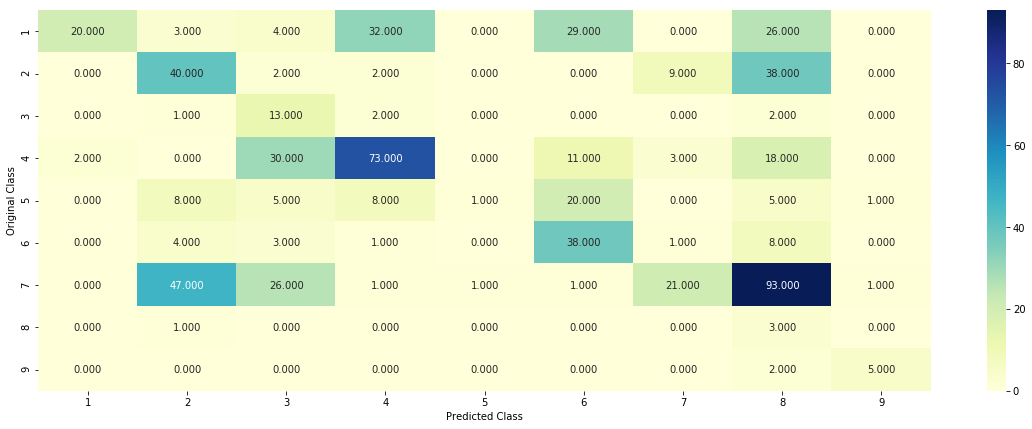

-------------------- Precision matrix (Columm Sum=1) --------------------


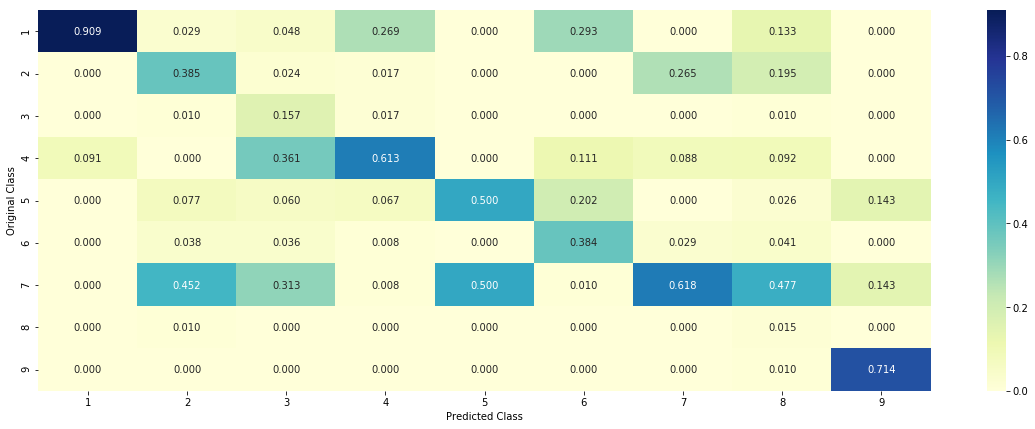

-------------------- Recall matrix (Row sum=1) --------------------


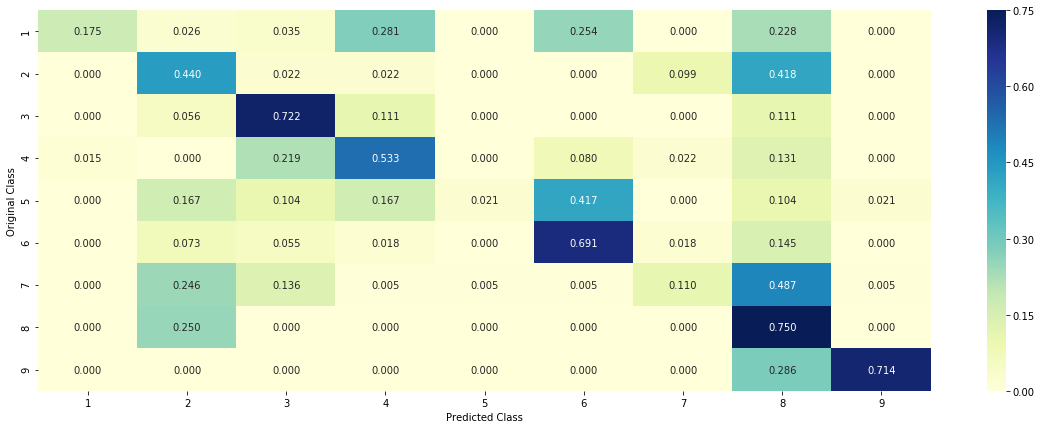

In [143]:
# Assignment
plot_confusion_matrix(y_test, sig_clf.predict(test_x_responseCoding))

In [93]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.2657048897349608
for n_estimators = 10 and max depth =  3
Log Loss : 1.7459205010556096
for n_estimators = 10 and max depth =  5
Log Loss : 1.4368353925512503
for n_estimators = 10 and max depth =  10
Log Loss : 1.904597809032912
for n_estimators = 50 and max depth =  2
Log Loss : 1.7221951095007484
for n_estimators = 50 and max depth =  3
Log Loss : 1.4984825877845531
for n_estimators = 50 and max depth =  5
Log Loss : 1.4593628982873716
for n_estimators = 50 and max depth =  10
Log Loss : 1.8434939703555409
for n_estimators = 100 and max depth =  2
Log Loss : 1.6182209245331227
for n_estimators = 100 and max depth =  3
Log Loss : 1.5199297988828253
for n_estimators = 100 and max depth =  5
Log Loss : 1.4177501184246677
for n_estimators = 100 and max depth =  10
Log Loss : 1.8227504417195126
for n_estimators = 200 and max depth =  2
Log Loss : 1.6622571648074496
for n_estimators = 200 and max depth =  3
Log Loss : 1.480077133914176

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.4177501184246677
Number of mis-classified points : 0.518796992481203
-------------------- Confusion matrix --------------------


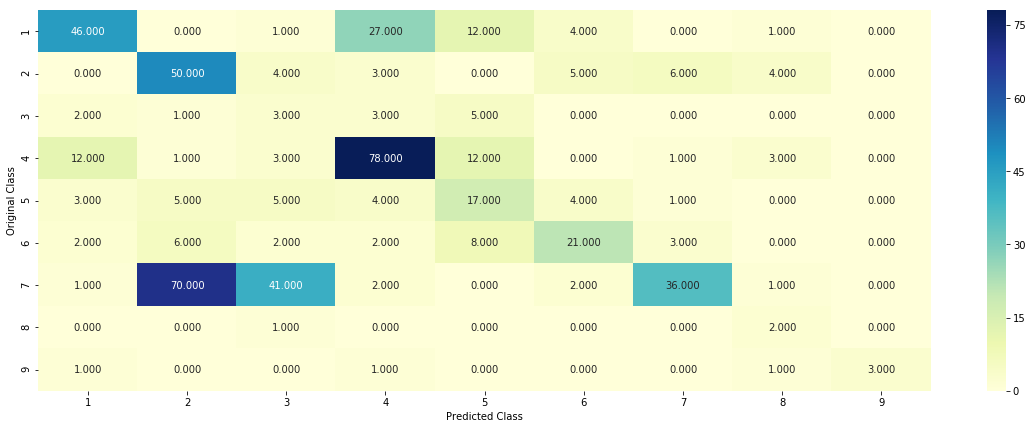

-------------------- Precision matrix (Columm Sum=1) --------------------


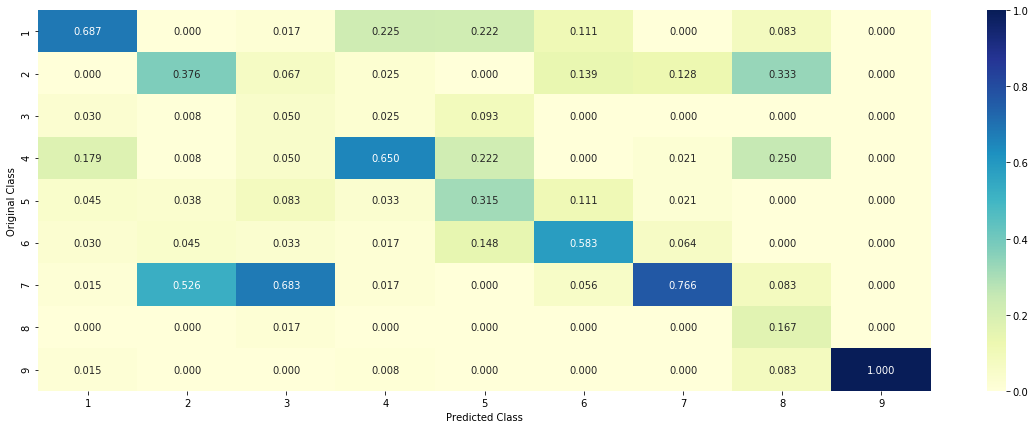

-------------------- Recall matrix (Row sum=1) --------------------


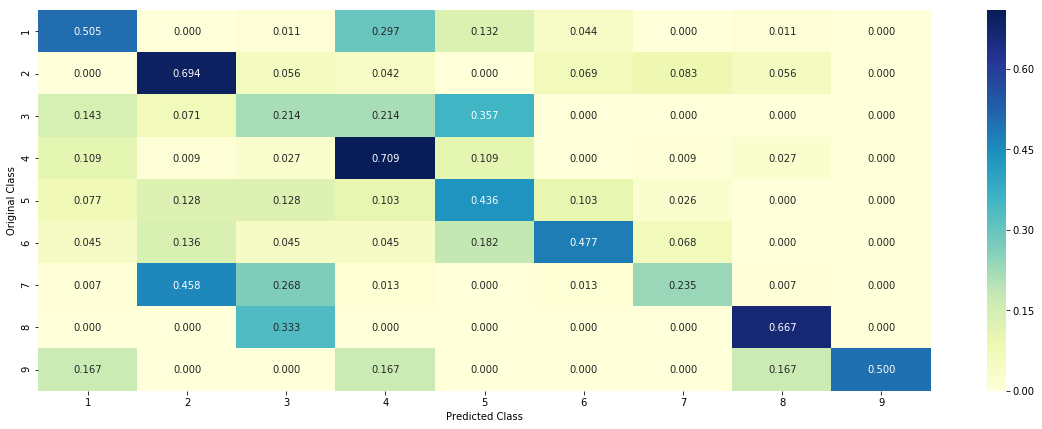

In [94]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [146]:
# Assigment
test_point_index = 4
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 7
Predicted Class Probabilities: [[0.0499 0.1753 0.0598 0.0732 0.1192 0.0583 0.2304 0.2161 0.0176]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [147]:
#Assignmnet
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 4
Predicted Class Probabilities: [[0.1247 0.0675 0.0723 0.2955 0.0707 0.1809 0.0664 0.0836 0.0382]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [148]:
# Assigment

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(svm_train_x, svm_train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(svm_train_x, svm_train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(svm_train_x, svm_train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(svm_train_x, svm_train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(svm_cv_y, sig_clf1.predict_proba(svm_cv_x))))
sig_clf2.fit(svm_train_x, svm_train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(svm_cv_y, sig_clf2.predict_proba(svm_cv_x))))
sig_clf3.fit(svm_train_x, svm_train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(svm_cv_y, sig_clf3.predict_proba(svm_cv_x))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(svm_train_x, svm_train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" %\
          (i, log_loss(svm_cv_y, sclf.predict_proba(svm_cv_x))))
    log_error =log_loss(svm_cv_y, sclf.predict_proba(svm_cv_x))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.09
Support vector machines : Log Loss: 1.65
Naive Bayes : Log Loss: 1.17
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.045
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.553
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.171
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.287
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.643


In [97]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.24
Support vector machines : Log Loss: 1.72
Naive Bayes : Log Loss: 1.37
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.049
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.577
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.224
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.366
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.690


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.4680586077178868
Log loss (test) on the stacking classifier : 1.210804777921434
Number of missclassified point : 0.39398496240601505
-------------------- Confusion matrix --------------------


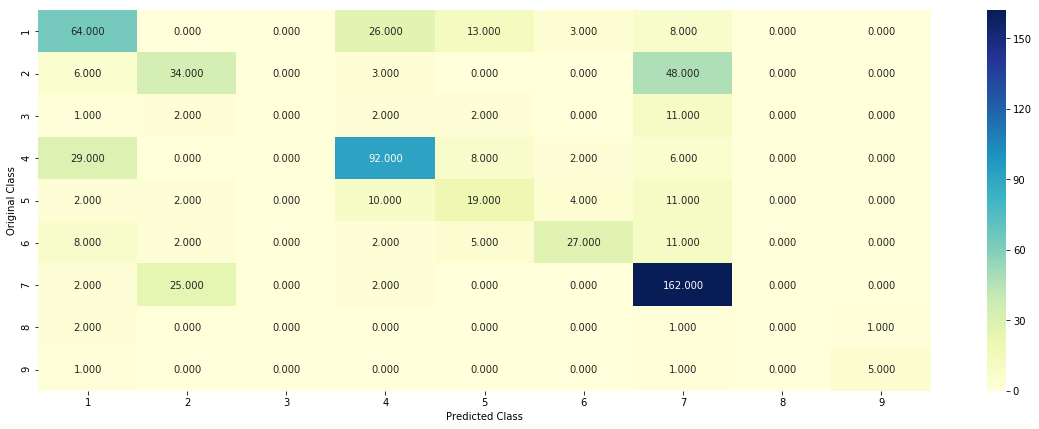

-------------------- Precision matrix (Columm Sum=1) --------------------


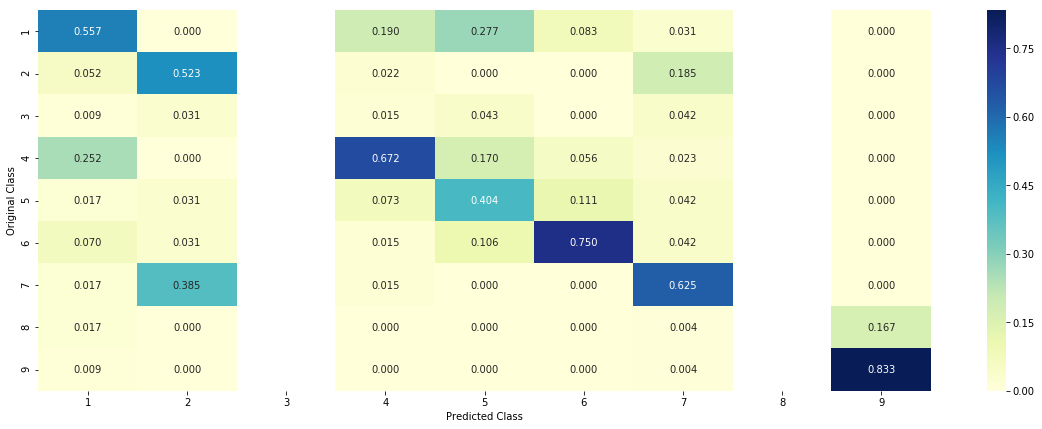

-------------------- Recall matrix (Row sum=1) --------------------


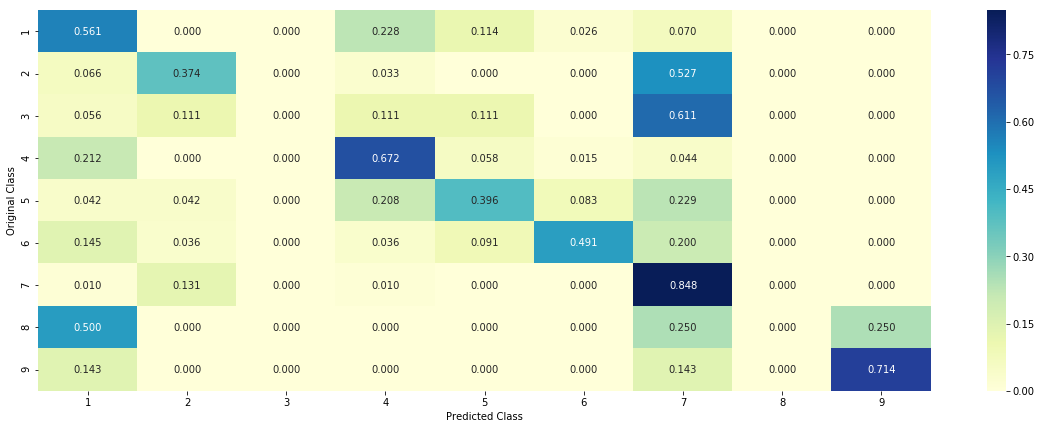

In [149]:
# Assignment
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidf, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_tfidf))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_tfidf))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tfidf))

In [186]:
modelList.append("StackingClassifier")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.21080")

Log loss (train) on the stacking classifier : 0.6760284396805781
Log loss (CV) on the stacking classifier : 1.2243084610674686
Log loss (test) on the stacking classifier : 1.1562525475350196
Number of missclassified point : 0.37293233082706767
-------------------- Confusion matrix --------------------


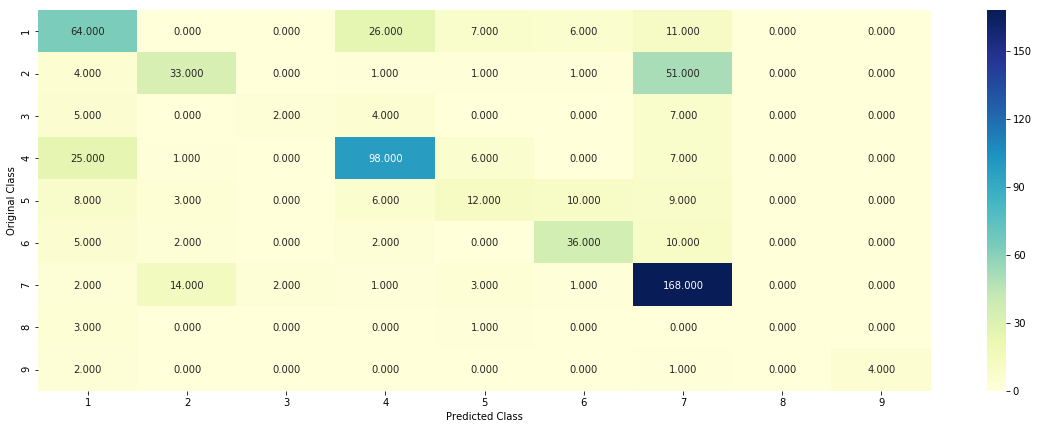

-------------------- Precision matrix (Columm Sum=1) --------------------


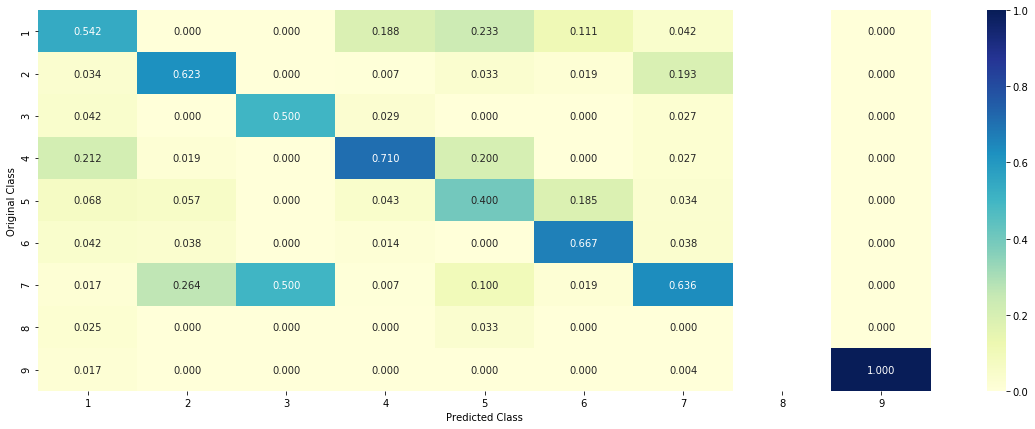

-------------------- Recall matrix (Row sum=1) --------------------


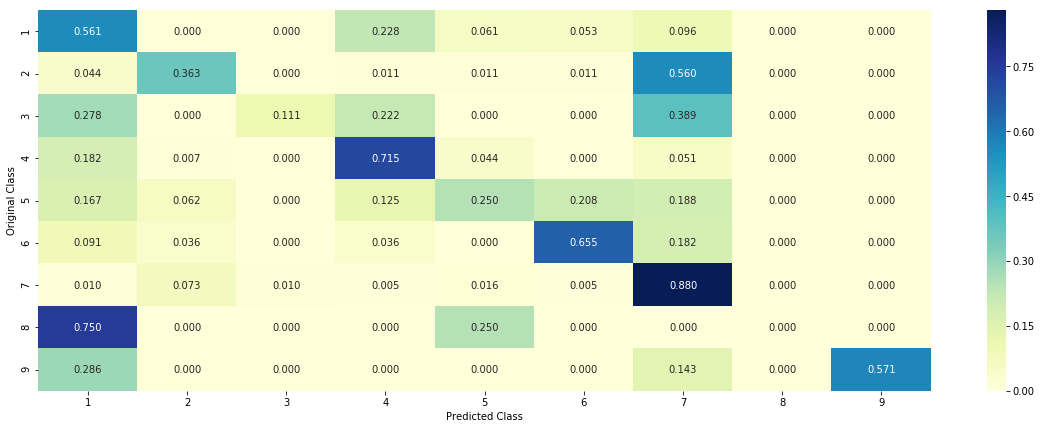

In [98]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8137299488054894
Log loss (test) on the VotingClassifier : 1.1850680196530252
Number of missclassified point : 0.3849624060150376
-------------------- Confusion matrix --------------------


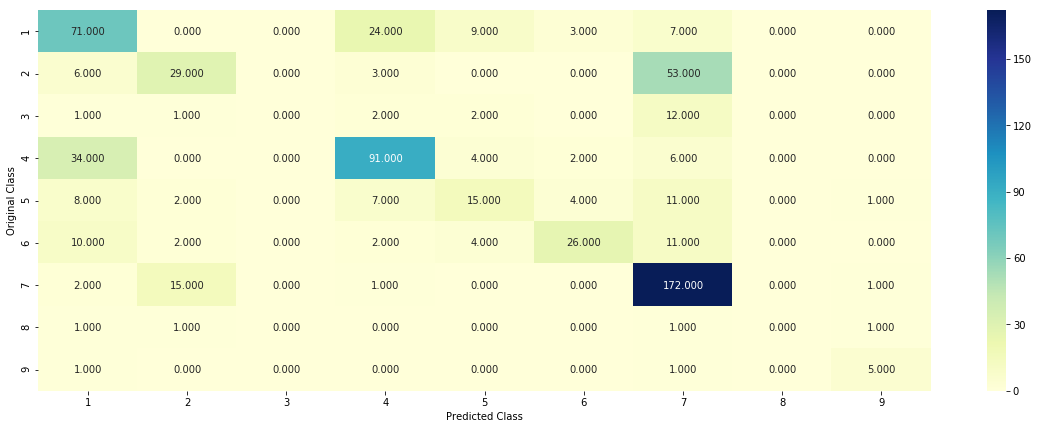

-------------------- Precision matrix (Columm Sum=1) --------------------


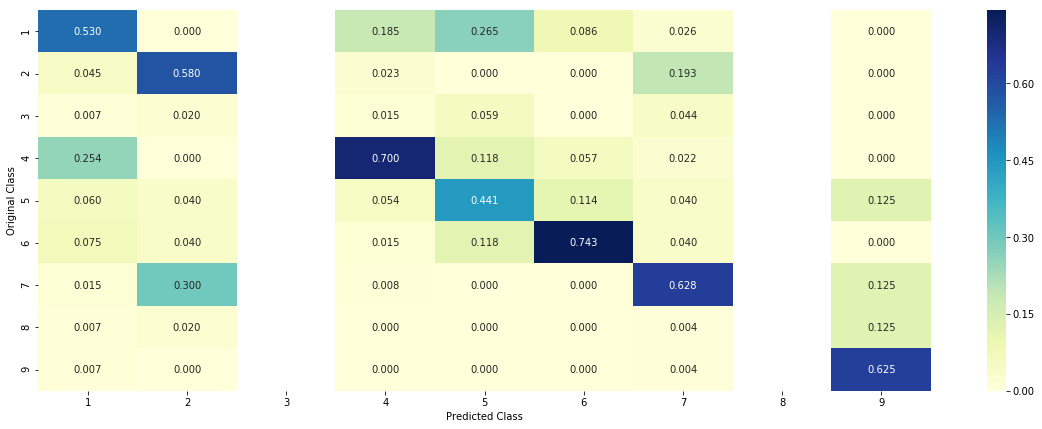

-------------------- Recall matrix (Row sum=1) --------------------


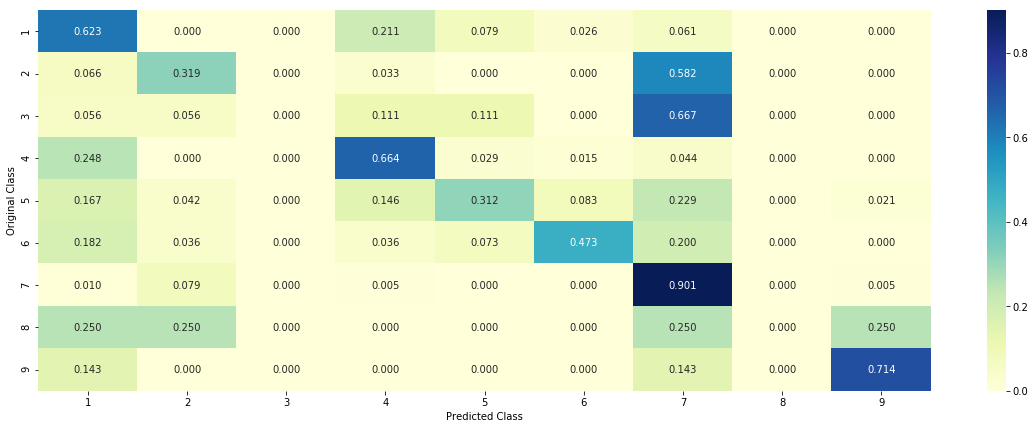

In [150]:
#Assignment
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidf, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tfidf)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tfidf)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tfidf))

In [187]:
modelList.append("MaximumVoting")
featureList.append("OneHotEncodingTfidf")
logLossList.append("1.18506")

Log loss (train) on the stacking classifier : 0.6760284396805781
Log loss (CV) on the stacking classifier : 1.2243084610674686
Log loss (test) on the stacking classifier : 1.1562525475350196
Number of missclassified point : 0.37293233082706767
-------------------- Confusion matrix --------------------


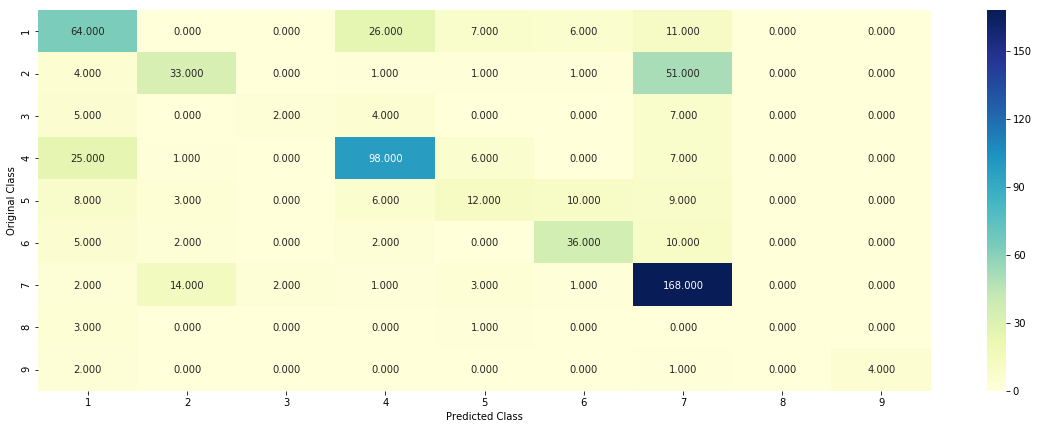

-------------------- Precision matrix (Columm Sum=1) --------------------


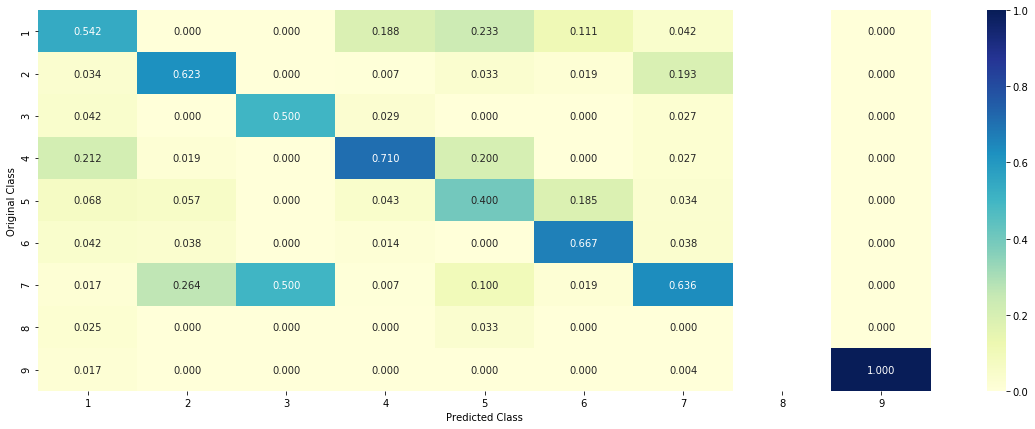

-------------------- Recall matrix (Row sum=1) --------------------


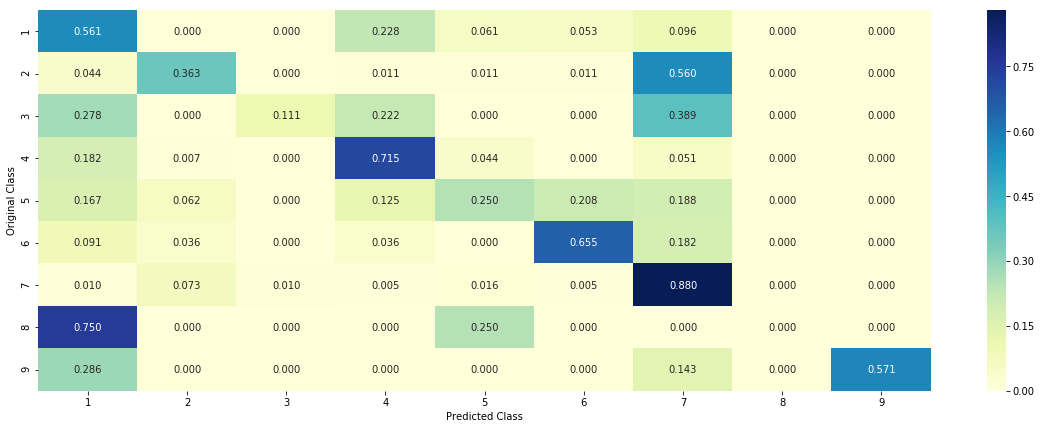

In [98]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

In [193]:
resultDataFrame = pd.DataFrame(resultsDict)
resultDataFrame.drop([3], inplace=True)
resultDataFrame

Model              Feature   Log loss
0          NaiveBayes  OneHotEncodingTfidf     1.2495
1                 Knn  ResponseCodingTfidf    1.10027
2  LogisticRegression  OneHotEncodingTfidf    1.03558
4        RandomForest  OneHotEncodingTfidf    1.26702
5        RandomForest  ResponseCodingTfidf     1.7199
6  StackingClassifier  OneHotEncodingTfidf    1.21080
7       MaximumVoting  OneHotEncodingTfidf    1.18506
8           LinearSVC  OneHotEncodingTfidf  1.0973723

## Logistic regression Word to vec

In [195]:
list_of_sent = train_df['TEXT'].tolist()

In [213]:
list_of_sent[0]

'noonan syndrome autosomal dominant congenital disorder encompasses effects multiple organ systems including distinctive facial features heart defects short stature learning difficulties predisposition malignancies clinical manifestations roberts et al 2013 belongs group genetic syndromes rasopathies ras pathway disorders caused mutations genes encode proteins involved ras mapk mitogen activated protein kinase signaling pathways zenker 2011 germline mutations ptpn11 sos1 kras nras raf1 braf map2k1 rit1 underlie noonan syndrome aoki et al 2013 roberts et al 2013 disease causing mutations usually enhance signal flow ras mapk cascades schubbert et al 2007 moreover mutations two genes shoc2 cbl mim 165360 reported patients noonan like phenotypes additional untypical features cordeddu et al 2009 martinelli et al 2010 niemeyer et al 2010 perez et al 2010 besides somatic cbl mutations found various myeloproliferative disorders caligiuri et al 2007 sargin et al 2007 loh et al 2009 makishima et

In [205]:
from gensim.models import Word2Vec

In [225]:
list_of_sent = []
for sent in train_df['TEXT'].values:
    list_of_sent.append(sent.split())

In [226]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=150, workers=10)

In [228]:
w2v_words = list(w2v_model.wv.vocab)

In [229]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(150) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [232]:
list_of_sent = []
for sent in test_df['TEXT'].values:
    list_of_sent.append(sent.split())

In [234]:
del sent_vectors

In [235]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(150) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [230]:
del list_of_sent

In [231]:
# Assignment
train_x_w2v = hstack((train_gene_var_onehotCoding, sent_vectors)).tocsr()

In [236]:
# Assignment
test_x_w2v = hstack((test_gene_var_onehotCoding, sent_vectors)).tocsr()

In [237]:

alpha = [10 ** x for x in range(-6, 3)]

clf = GridSearchCV(SGDClassifier(class_weight='balanced', penalty='l2', loss='log', random_state=42),\
                   param_grid={'alpha' : alpha},\
                   n_jobs=-1, scoring='neg_log_loss', refit=True)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf.fit(train_x_w2v, train_y)

predict_y = sig_clf.predict_proba(test_x_w2v)
print("The test log loss is:",\
      log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))

#plot_confusion_matrix(y_test, sig_clf.predict(test_x_tfidf.toarray()))

The test log loss is: 1.1412875334040693


In [238]:
modelList.append("logisticRegression")
featureList.append("OneHotEncodingWord2Vec")
logLossList.append("1.1412")

>Test log using w2v is *1.1412*

## Hashed Features for Variation

## Text features tfidf n-gram (1,2) followed by Truncated SVD

In [26]:
variation_hashed_features = variation_hashed_features.toarray()

In [29]:
variation_hashed_features[654]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [44]:
variation_hashed_features_test = feature_hasher.transform(test_df['Variation'])

### Ngram(1,2) tfidf vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df = 3, max_features = 3000)

In [16]:
train_text_feature_tfidf = tfidf_vectorizer.fit_transform(train_df.TEXT)

In [17]:
test_text_feature_tfidf = tfidf_vectorizer.transform(test_df.TEXT)

In [22]:
train_text_feature_tfidf.shape

(2656, 3000)

In [96]:
test_text_feature_tfidf.shape

(665, 3000)

In [18]:
from sklearn.decomposition import TruncatedSVD

In [19]:
svd = TruncatedSVD(1000)

In [20]:
train_text_feature_tfidf = svd.fit_transform(train_text_feature_tfidf)

In [21]:
test_text_feature_tfidf = svd.transform(test_text_feature_tfidf)

In [92]:
svd.explained_variance_ratio_.sum()

0.9980086342860756

In [22]:
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))

train_x_tfidf = hstack((train_gene_var_onehotCoding, train_text_feature_tfidf)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidf = hstack((test_gene_var_onehotCoding, test_text_feature_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

for C = 1e-05
Log Loss : 1.1758371551353166
for C = 0.0001
Log Loss : 1.1321635287082477
for C = 0.001
Log Loss : 1.1346868943345965
for C = 0.01
Log Loss : 1.3105830181711016
for C = 0.1
Log Loss : 1.5116217669639447
for C = 1
Log Loss : 1.5502016263743914
for C = 10
Log Loss : 1.550196042249455
for C = 100
Log Loss : 1.5501960513190671


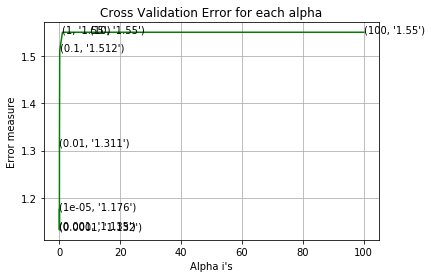

For values of best alpha =  0.0001 The train log loss is: 0.5142781092086331
For values of best alpha =  0.0001 The cross validation log loss is: 0.5084418348556334
For values of best alpha =  0.0001 The test log loss is: 1.0662172670401362


In [99]:
#Assignment

svm_train_x, svm_cv_x, svm_train_y, svm_cv_y =  train_test_split(train_x_tfidf, train_y, stratify=train_y, test_size=0.2)

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(svm_train_x, svm_train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(svm_train_x, svm_train_y)
    sig_clf_probs = sig_clf.predict_proba(svm_cv_x)
    cv_log_error_array.append(log_loss(svm_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(svm_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(svm_train_x)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(svm_train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svm_cv_x)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(svm_cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [23]:
from xgboost import XGBClassifier

In [24]:
params_dict = {'max_depth' : [10,20,30],
              'learning_rate' : [0.01, 0.05 , 0.15, 0.1],
              'n_estimators' : [100, 150, 200]}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
clf = RandomizedSearchCV(param_distributions=params_dict, estimator=XGBClassifier(objective='multi:softprob',n_jobs = -1), \
                   n_jobs=-1, scoring='neg_log_loss', refit=True)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")

sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(test_x_tfidf)
print("The test log loss is:",\
      log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))


The test log loss is: 1.0989811516669235


for C = 1e-05
Log Loss : 1.1038532234385587
for C = 0.0001
Log Loss : 1.0445183154197801
for C = 0.001
Log Loss : 1.0822194621633456
for C = 0.01
Log Loss : 1.2760157454297631
for C = 0.1
Log Loss : 1.4814575529010106
for C = 1
Log Loss : 1.5177794776054527
for C = 10
Log Loss : 1.5177794813652241
for C = 100
Log Loss : 1.517779419602361


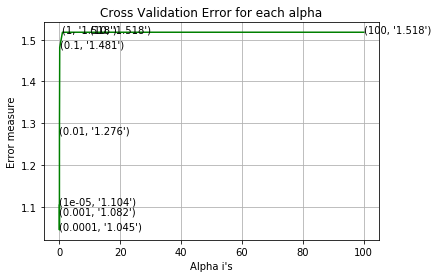

For values of best alpha =  0.0001 The train log loss is: 0.4889512597994784
For values of best alpha =  0.0001 The cross validation log loss is: 0.4796040486451729
For values of best alpha =  0.0001 The test log loss is: 1.084621254207928


In [27]:
#Assignment

svm_train_x, svm_cv_x, svm_train_y, svm_cv_y =  train_test_split(train_x_tfidf, train_y, stratify=train_y, test_size=0.2)

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(svm_train_x, svm_train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(svm_train_x, svm_train_y)
    sig_clf_probs = sig_clf.predict_proba(svm_cv_x)
    cv_log_error_array.append(log_loss(svm_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(svm_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(svm_train_x)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(svm_train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(svm_cv_x)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(svm_cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

## Word cloud analysis

* Word cloud analysis to check if each class has some unique words did not yield anything.
* Although there were no unique words per class, It can be generalized that for some classes few wrods appear more number of times than the other words.

In [28]:
train_df.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT'], dtype='object')

In [30]:
train_df['Class'].value_counts()

7    762
4    549
1    454
2    361
6    220
5    194
3     71
9     30
8     15
Name: Class, dtype: int64

In [31]:
sum(map(lambda x : len(x) , train_df[train_df['Class'] == 7]['TEXT'].values)) / 762

60380.11417322834

In [32]:
sum(map(lambda x : len(x) , train_df[train_df['Class'] == 4]['TEXT'].values)) / 549

46707.89071038251

In [33]:
sum(map(lambda x : len(x) , train_df[train_df['Class'] == 1]['TEXT'].values)) / 454

49371.67621145374

In [34]:
train_word_length_feature = list(map(lambda x : len(x), train_df['TEXT'].values))

In [35]:
test_word_length_feature = list(map(lambda x : len(x), test_df['TEXT'].values))

In [21]:
from wordcloud import WordCloud

In [20]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 7]['TEXT'].values)

(-0.5, 399.5, 199.5, -0.5)

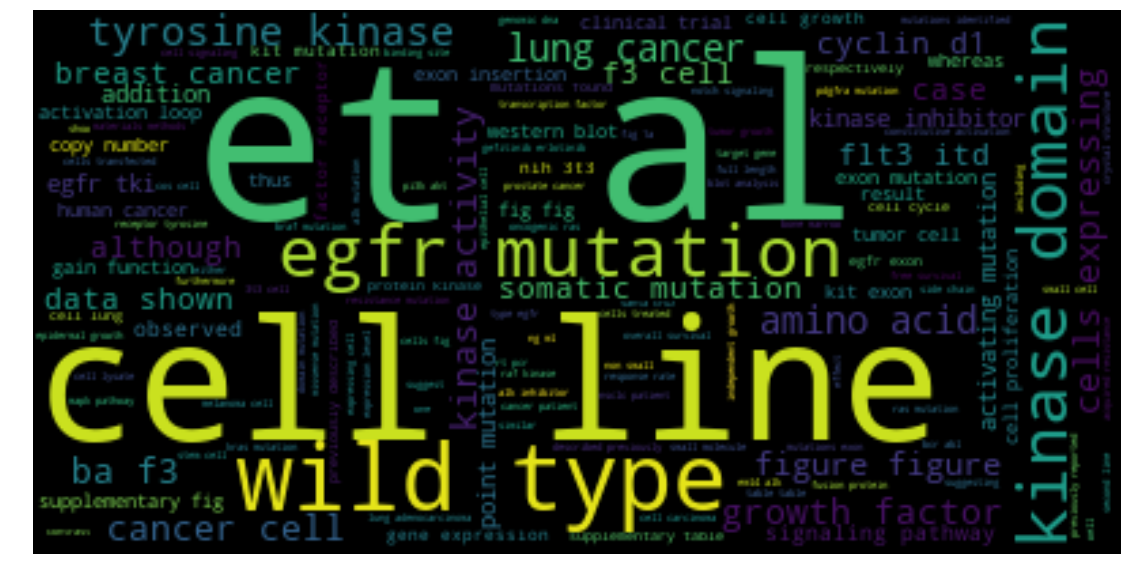

In [22]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [41]:
unique_words_class_7 = set(wordcloud.words_.keys())

tyrosine and kinase are more frequently found words for class 7. 
==============================================================
Adding a feature that tells us the count of these words would be use full

In [42]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 4]['TEXT'].values)

(-0.5, 399.5, 199.5, -0.5)

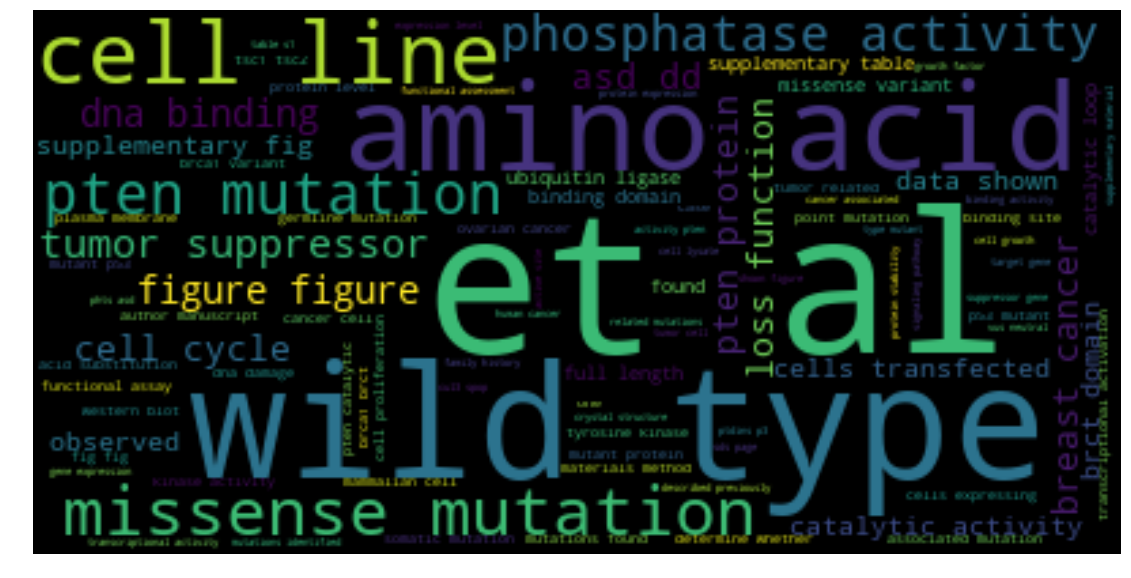

In [43]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [44]:
unique_words_class_4 = set(wordcloud.words_.keys())

Phosphatase and missense are the important words for calss 4
===================================
>Countin the number of these words will be use full fot class 4 predictions

(-0.5, 399.5, 199.5, -0.5)

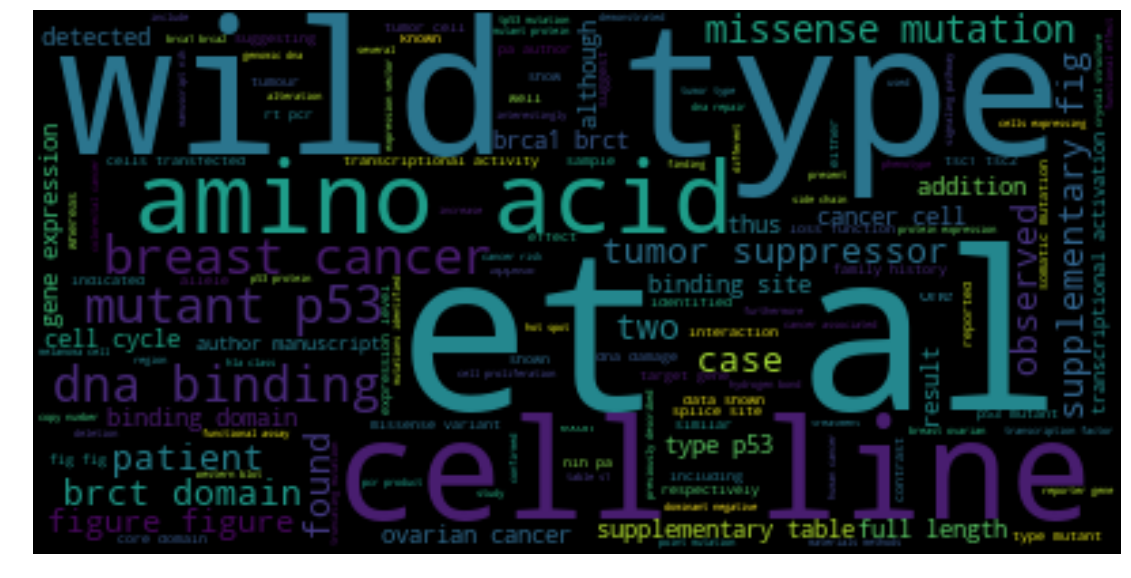

In [47]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 1]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [48]:
unique_words_class_1 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

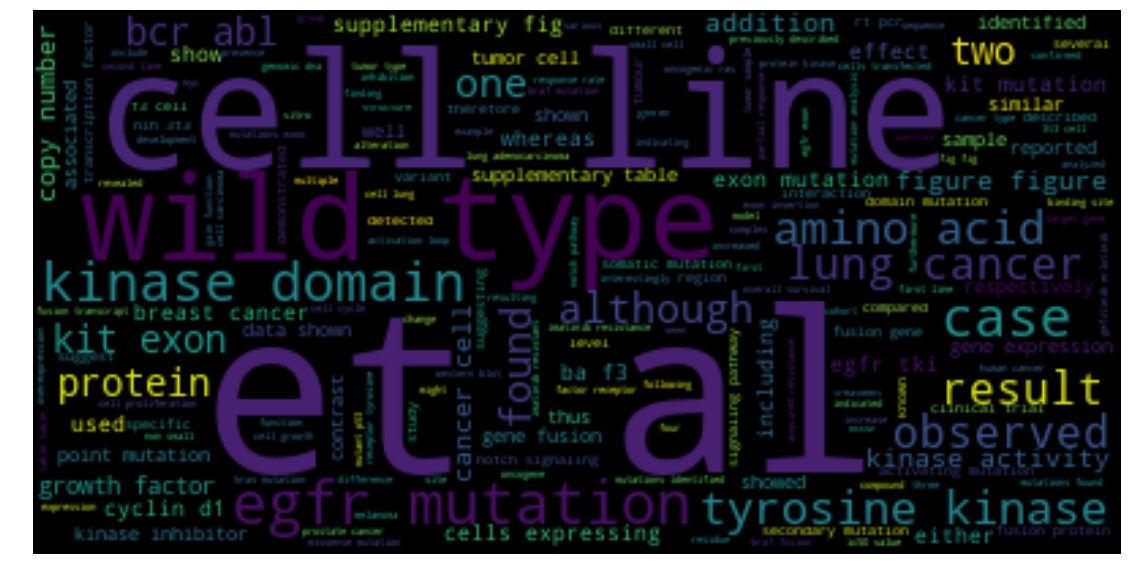

In [49]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 2]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [50]:
unique_words_class_2 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

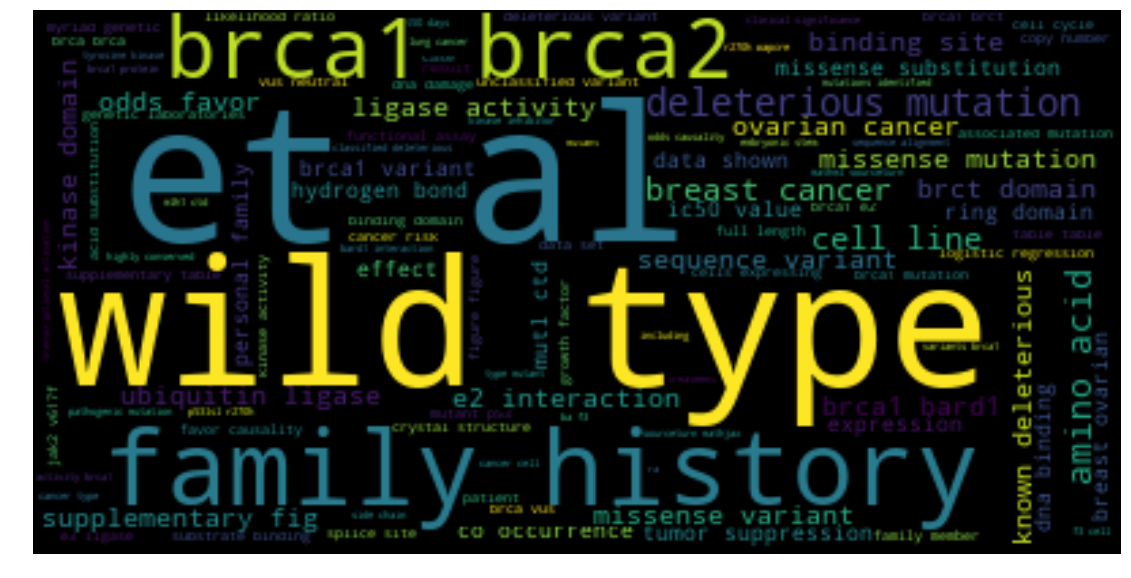

In [51]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 6]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [52]:
unique_words_class_6 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

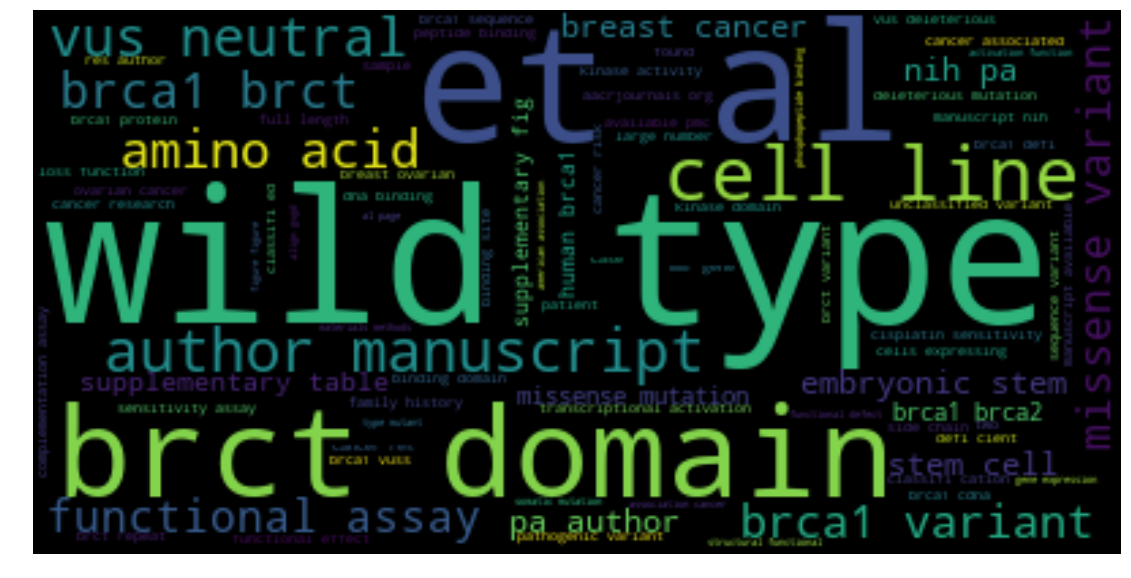

In [54]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 5]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [55]:
unique_words_class_5 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

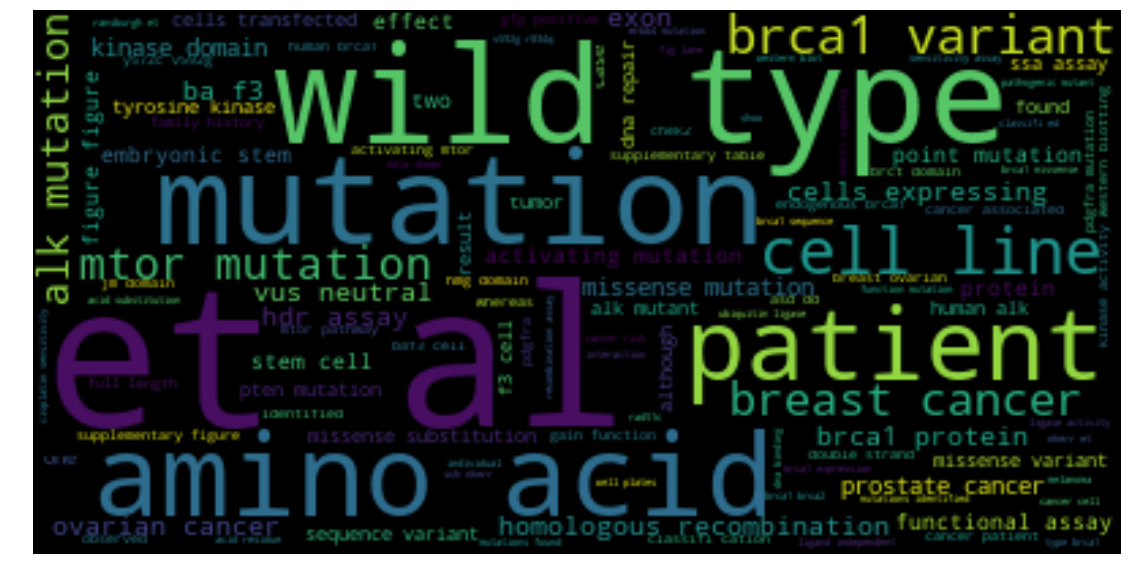

In [56]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 3]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [57]:
unique_words_class_3 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

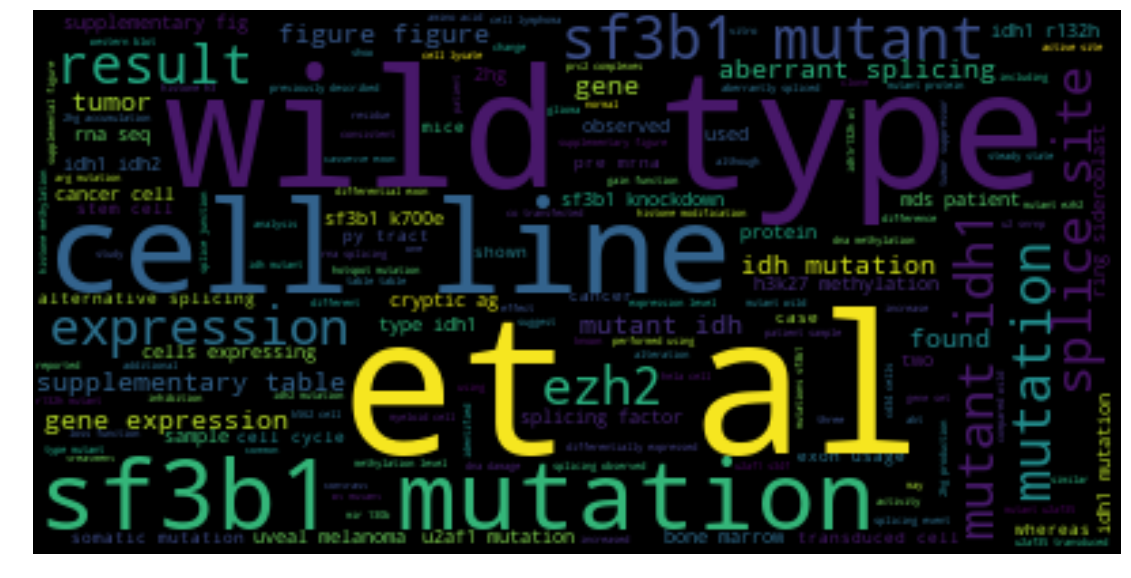

In [58]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 9]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [59]:
unique_words_class_9 = set(wordcloud.words_.keys())

(-0.5, 399.5, 199.5, -0.5)

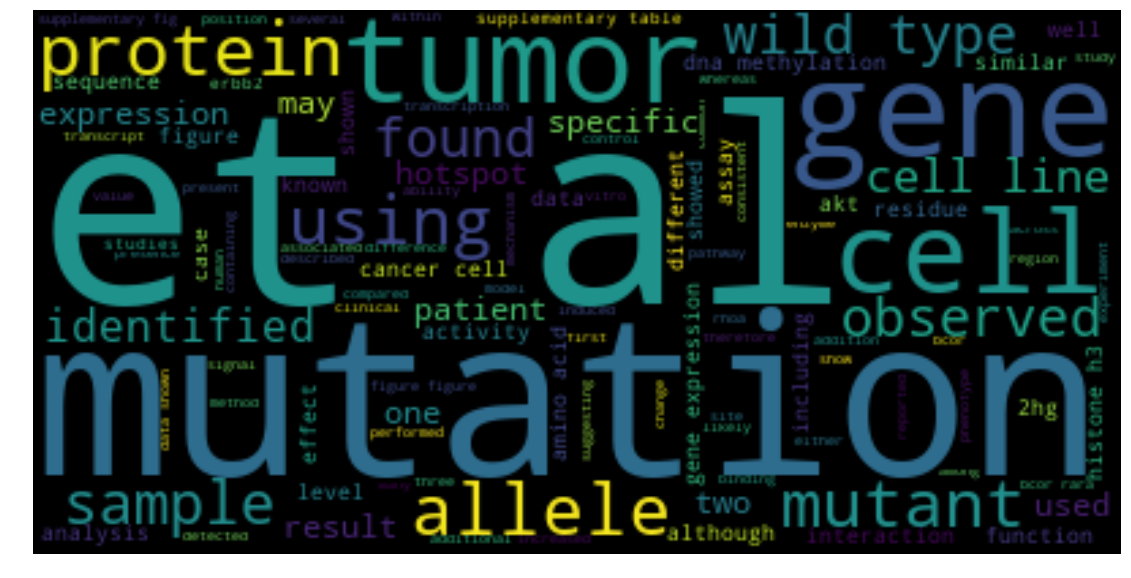

In [60]:
text_for_wordcloud = " ".join(train_df[train_df['Class'] == 8]['TEXT'].values)

# Generate a word cloud image
wordcloud = WordCloud().generate(text_for_wordcloud)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## TFIDF Vectorizer of text - (1,n) gram  - With Maximum 2000 Features

In [24]:
train_df.to_pickle('train_df.p')
test_df.to_pickle('test_df.p')

In [51]:
text_vectorizer = TfidfVectorizer(ngram_range=(1,4), min_df=3, max_features=2000)

train_text_feature_ngram = text_vectorizer.fit_transform(train_df['TEXT'])
#train_text_feature_ngram = normalize(train_text_feature_ngram, axis=0)

test_text_feature_ngram = text_vectorizer.transform(test_df['TEXT'])
#test_text_feature_ngram = normalize(test_text_feature_ngram, axis=0)

In [52]:
train_text_feature_ngram = hstack((train_gene_var_onehotCoding, train_text_feature_ngram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_text_feature_ngram = hstack((test_gene_var_onehotCoding, test_text_feature_ngram)).tocsr()
test_y = np.array(list(test_df['Class']))

In [53]:
clf1 = SGDClassifier(penalty='l2', loss='log', class_weight='balanced', random_state=0)

In [54]:
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")
sig_clf1.fit(train_text_feature_ngram, train_y)

predict_y = sig_clf1.predict_proba(test_text_feature_ngram)
print("The test log loss is:",\
      log_loss(test_y, predict_y, labels=sig_clf1.classes_, eps=1e-15))

The test log loss is: 1.0115945075145372


In [55]:
clf2 = SGDClassifier(penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")
sig_clf2.fit(train_text_feature_ngram, train_y)

predict_y = sig_clf2.predict_proba(test_text_feature_ngram)
print("The test log loss is:",\
      log_loss(test_y, predict_y, labels=sig_clf2.classes_, eps=1e-15))

The test log loss is: 1.0925745900390007


In [56]:
text_vectorizer = TfidfVectorizer(ngram_range=(1,7), min_df=3, max_features=2000)

train_text_feature_ngram = text_vectorizer.fit_transform(train_df['TEXT'])
#train_text_feature_ngram = normalize(train_text_feature_ngram, axis=0)

test_text_feature_ngram = text_vectorizer.transform(test_df['TEXT'])
#test_text_feature_ngram = normalize(test_text_feature_ngram, axis=0)

In [57]:
train_text_feature_ngram = hstack((train_gene_var_onehotCoding, train_text_feature_ngram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_text_feature_ngram = hstack((test_gene_var_onehotCoding, test_text_feature_ngram)).tocsr()
test_y = np.array(list(test_df['Class']))

In [58]:
clf1 = SGDClassifier(penalty='l2', loss='log', class_weight='balanced', random_state=0)

In [59]:
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")
sig_clf1.fit(train_text_feature_ngram, train_y)

predict_y = sig_clf1.predict_proba(test_text_feature_ngram)
print("The test log loss is:",\
      log_loss(test_y, predict_y, labels=sig_clf1.classes_, eps=1e-15))

The test log loss is: 1.011576170191902


In [60]:
clf2 = SGDClassifier(penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")
sig_clf2.fit(train_text_feature_ngram, train_y)

predict_y = sig_clf2.predict_proba(test_text_feature_ngram)
print("The test log loss is:",\
      log_loss(test_y, predict_y, labels=sig_clf2.classes_, eps=1e-15))

The test log loss is: 1.1045545994670702


## Conclusion

Steps I tried
==========
* Used words to vectors. Trained the word to vector algorithm on the train data set and transformed the test data set. Used the word vectors along side one hot encoded vectors of gene and variation.
    - The log loss was worsned to 1.1412
* Used (1,2) gram tfidf vectorizer. This feature size was very high, used Truncated SVD to reduce the features while keeping 99% of the information
    - The test log loss was better (1.09) than w2v but still did not beat the SVC with one hot encoding and one gram tfidf(1.06)
* Tried Word Cloud analysis to check if ther are unique words in each class
    - The frequency of few words were more in few classes. But the not significant enough to cause a difference
* Tried SVC on one hot encoding gene and variation and (1,2) gram tfidf.
    - The log loss is 1.08
* Experimented on Tfidf with various n-grams and max features. It was noticed that normalization was increasin the log loss. And Tfidf vectorizer with 1,4 gives satidfactory results with a log loss of 1.01


In [63]:
results_df = pd.DataFrame({}, columns=['Gene', 'Variation', 'Text', 'Model', 'Log loss' ])

results_df.loc['a', results_df.columns] = ['Unigrams', 'Unigrams', 'Word2Vec', 'SVC', 1.1412]

results_df.loc['b', results_df.columns] = ['Unigrams', 'Unigrams', 'Tfidf(1,2)', 'XGBoost', 1.09]

results_df.loc['c', results_df.columns] = ['Unigrams', 'Unigrams', 'Tfidf(1,2)', 'SVC', 1.08]

results_df.loc['d', results_df.columns] = ['Unigrams', 'Unigrams', 'Unigrams', 'SVC', 1.06]

results_df.loc['e', results_df.columns] = ['Unigrams', 'Unigrams', 'Tfidf(1,4)', 'Linear Regression', 1.01159]

results_df.loc['f', results_df.columns] = ['Unigrams', 'Unigrams', 'Tfidf(1,4)', 'SCV', 1.0925]

results_df.loc['g', results_df.columns] = ['Unigrams', 'Unigrams', 'Tfidf(1,6)', 'Linear Regression', 1.01157]

results_df

Gene Variation        Text              Model Log loss
a  Unigrams  Unigrams    Word2Vec                SVC   1.1412
b  Unigrams  Unigrams  Tfidf(1,2)            XGBoost     1.09
c  Unigrams  Unigrams  Tfidf(1,2)                SVC     1.08
d  Unigrams  Unigrams    Unigrams                SVC     1.06
e  Unigrams  Unigrams  Tfidf(1,4)  Linear Regression  1.01159
f  Unigrams  Unigrams  Tfidf(1,4)                SCV   1.0925
g  Unigrams  Unigrams  Tfidf(1,6)  Linear Regression  1.01157

In [64]:
results_df[results_df['Log loss'] == results_df['Log loss'].min()]

Gene Variation        Text              Model Log loss
g  Unigrams  Unigrams  Tfidf(1,6)  Linear Regression  1.01157

__The best model is One hot encoding of gene and variation and 1,7 gram tfidf of text feature = 1.01__
======================================